# Harvard Extension School

## CSCI-83 Fundamentals of Data Science

### Seymur Hasanov

# Project Proposal: Energy Efficiency Analysis in Buildings

## Introduction

Energy efficiency in buildings is a critical topic for reducing both environmental impact and operational costs. By analyzing key building parameters, this project aims to uncover the most significant predictors of heating and cooling loads. This will help engineers to guide future decisions in architectural design and energy optimization.

## Objective

The main objective of this project is to perform a thorough analysis of the UCI Energy Efficiency dataset. The focus is on identifying statistically significant factors that influence energy consumption for heating and cooling. By using statistical inference techniques, including regression analysis and Bayesian modeling, the project seeks to:

1. Quantify the effect sizes of predictors on heating and cooling loads.
2. Identify the variables with the most significant impact.
3. Provide actionable insights for energy-efficient building designs.

This proposal aligns with the course’s emphasis on inference by exploring relationships between variables, estimating effect sizes, and incorporating uncertainty into predictions.

## Importance

Improving energy efficiency not only reduces costs for building owners but also contributes to global efforts in mitigating climate change. Insights from this analysis can benefit architects, engineers, and policymakers by highlighting which building parameters to prioritize for energy-efficient designs.

## Dataset Overview

### Dataset Description
The [UCI Energy Efficiency dataset](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency), sourced from the UCI Machine Learning Repository, contains building design parameters and their associated energy efficiency metrics. The dataset consists of:
- **Features (8 total)**:
  - **X1**: Relative Compactness
  - **X2**: Surface Area
  - **X3**: Wall Area
  - **X4**: Roof Area
  - **X5**: Overall Height
  - **X6**: Orientation (Categorical: 2, 3, 4, or 5)
  - **X7**: Glazing Area
  - **X8**: Glazing Area Distribution (Categorical: 0–5)
- **Targets (2 total)**:
  - **Y1**: Heating Load (kWh/m²)
  - **Y2**: Cooling Load (kWh/m²)

### Adequacy of the Dataset
This dataset is well-suited for the project goals:

1. It includes both continuous and categorical variables. This allows for a variety of analytical techniques.
2. It contains no missing values, so simplifying preprocessing.
3. The features directly relate to energy efficiency, making it relevant for statistical inference.

### Proposed Analysis
The analysis will focus on:
1. **Exploratory Data Analysis (EDA)**:
   - Investigating data distributions, variable relationships, and potential outliers.
   - Ensuring the dataset supports the project goals.
2. **Modeling**:
   - Using regression analysis to assess the significance of predictors.
   - Applying Bayesian techniques to account for uncertainty in effect size estimation.
3. **Deliverables**:
   - Visualizations, regression results, and a professional report summarizing actionable insights.

In [ ]:
# required libraries and packages
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import numpy.random as nr
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import pymc
import arviz as az
print(pymc.__version__)

%matplotlib inline
sns.set(style='ticks', palette='Set2')

5.19.1


In [ ]:
energy_efficiency = fetch_ucirepo(id=242)

The dataset is downloaded and prepared by combining features and targets into a single DataFrame, with columns renamed for clarity.


In [ ]:
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

# Combine features and targets
data = pd.concat([X, y], axis=1)

# Rename columns for clarity
data.columns = [
    "Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
    "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution",
    "Heating Load", "Cooling Load"
]

print(data.head())

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling Load  
0         21.33  
1         21.33  
2         21.33  
3         21.3

The dataset's metadata and variable information is shown below to understand its structure and details. This includes the names, roles (feature or target), types (e.g., continuous, integer), descriptions, and missing values for each variable.

In [ ]:
print(energy_efficiency.metadata)

{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

In [ ]:
print(energy_efficiency.variables)

  name     role        type demographic                description units  \
0   X1  Feature  Continuous        None       Relative Compactness  None   
1   X2  Feature  Continuous        None               Surface Area  None   
2   X3  Feature  Continuous        None                  Wall Area  None   
3   X4  Feature  Continuous        None                  Roof Area  None   
4   X5  Feature  Continuous        None             Overall Height  None   
5   X6  Feature     Integer        None                Orientation  None   
6   X7  Feature  Continuous        None               Glazing Area  None   
7   X8  Feature     Integer        None  Glazing Area Distribution  None   
8   Y1   Target  Continuous        None               Heating Load  None   
9   Y2   Target  Continuous        None               Cooling Load  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
5             no  
6             no  
7          

## Summary Statistics and Correlation Analysis

### Summary Statistics
The dataset's summary statistics provide key insights into the distribution of variables, including the mean, standard deviation, minimum, maximum, and percentiles for each feature. This allows us to understand the central tendency and variability in the dataset.

### Missing Values
The dataset contains no missing values, which simplifies preprocessing and ensures all data can be used for analysis.

### Correlation Analysis
A correlation heatmap is used to explore relationships between variables. The values range from -1 (strong negative correlation) to 1 (strong positive correlation). For example:
- **Heating Load** and **Cooling Load** are strongly correlated (0.98), indicating a significant relationship.
- **Relative Compactness** and **Heating Load** have a positive correlation (0.62), while **Roof Area** and **Heating Load** have a strong negative correlation (-0.86).

In [ ]:
print("Summary Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

# Cor matrix
correlation_matrix = data.corr()

Summary Statistics:
       Relative Compactness  Surface Area   Wall Area   Roof Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.

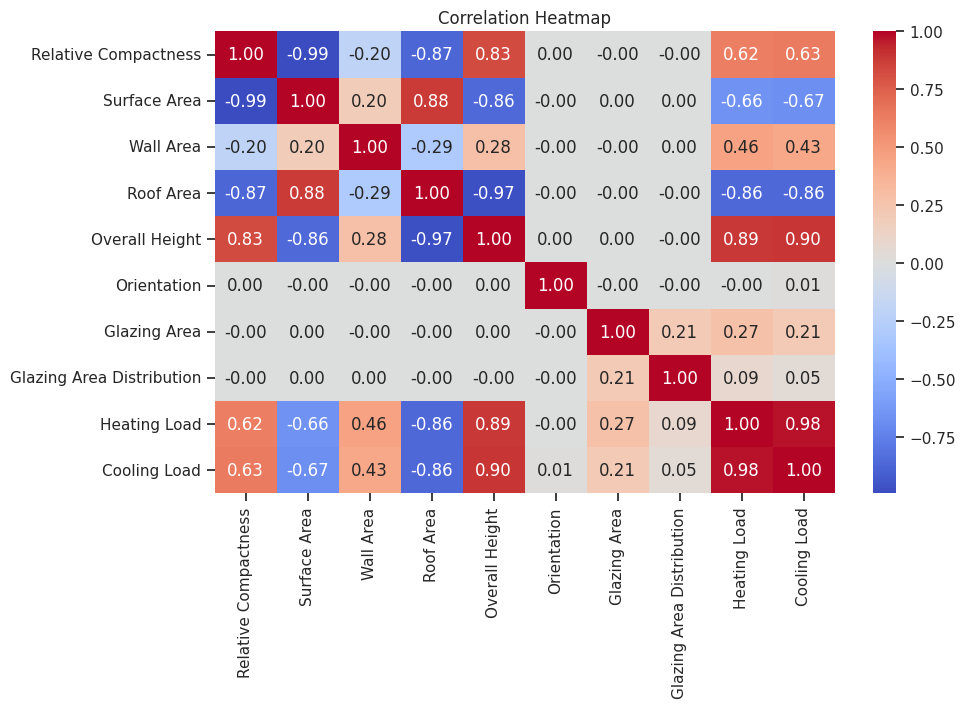

In [ ]:
# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Histograms for Continuous Variables

The plotted histograms below display the distribution of all variables in the dataset. Key observations include:
- Features like `Relative Compactness` and `Overall Height` show uniform distributions, reflecting standardized building designs.
- `Heating Load` and `Cooling Load` exhibit variability, with most values concentrated in the midrange but spanning a wide range overall.

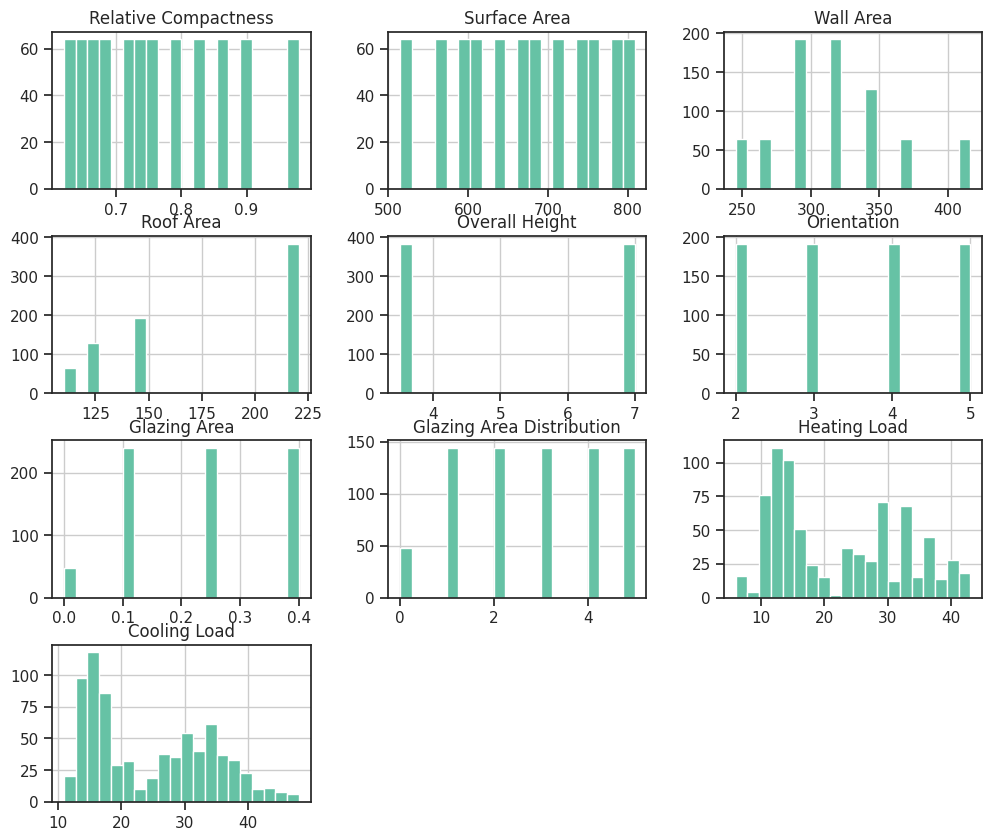

In [ ]:
# histograms for continuous variables
data.hist(bins=20, figsize=(12, 10))
plt.show()

### Heating Load by Orientation
The violin plot for Heating Load by Orientation shows that the distribution of Heating Load is fairly consistent across different orientations, with median values remaining similar. However, the spread of Heating Load varies slightly between orientations.

### Cooling Load by Glazing Area Distribution
The violin plot for Cooling Load by Glazing Area Distribution indicates a consistent median across all categories. The distribution of Cooling Load appears to widen as the Glazing Area Distribution increases.

These plots show how categorical variables like Orientation and Glazing Area Distribution influence Heating and Cooling Loads.

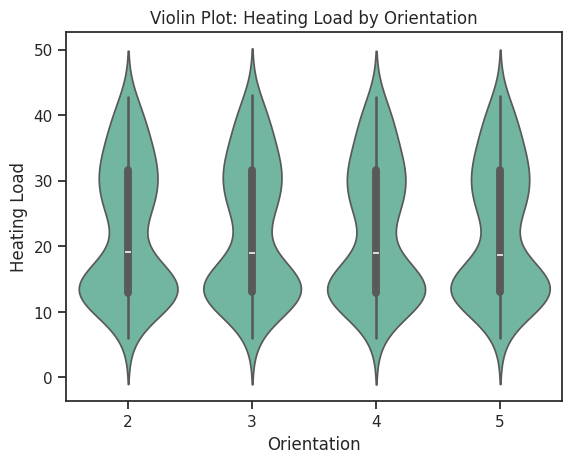

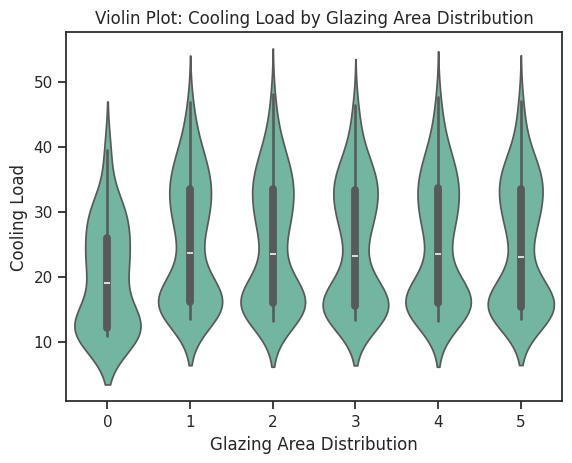

In [ ]:
# Violin plot for Heating Load by Orientation
sns.violinplot(x="Orientation", y="Heating Load", data=data)
plt.title("Violin Plot: Heating Load by Orientation")
plt.show()

# Violin plot for Cooling Load by Glazing Area Distribution
sns.violinplot(x="Glazing Area Distribution", y="Cooling Load", data=data)
plt.title("Violin Plot: Cooling Load by Glazing Area Distribution")
plt.show()

### Pair Plot of Key Variables

In these plots we provide an overview of the relationships and distributions between numerical variables in the dataset. Key observations include:

- **Heating Load** and **Cooling Load** are strongly correlated, as expected from the correlation matrix.
- **Relative Compactness** shows a clear linear trend with **Heating Load**, indicating its importance as a predictor.
- **Roof Area** has an inverse relationship with **Heating Load**, which aligns with the findings from the heatmap.

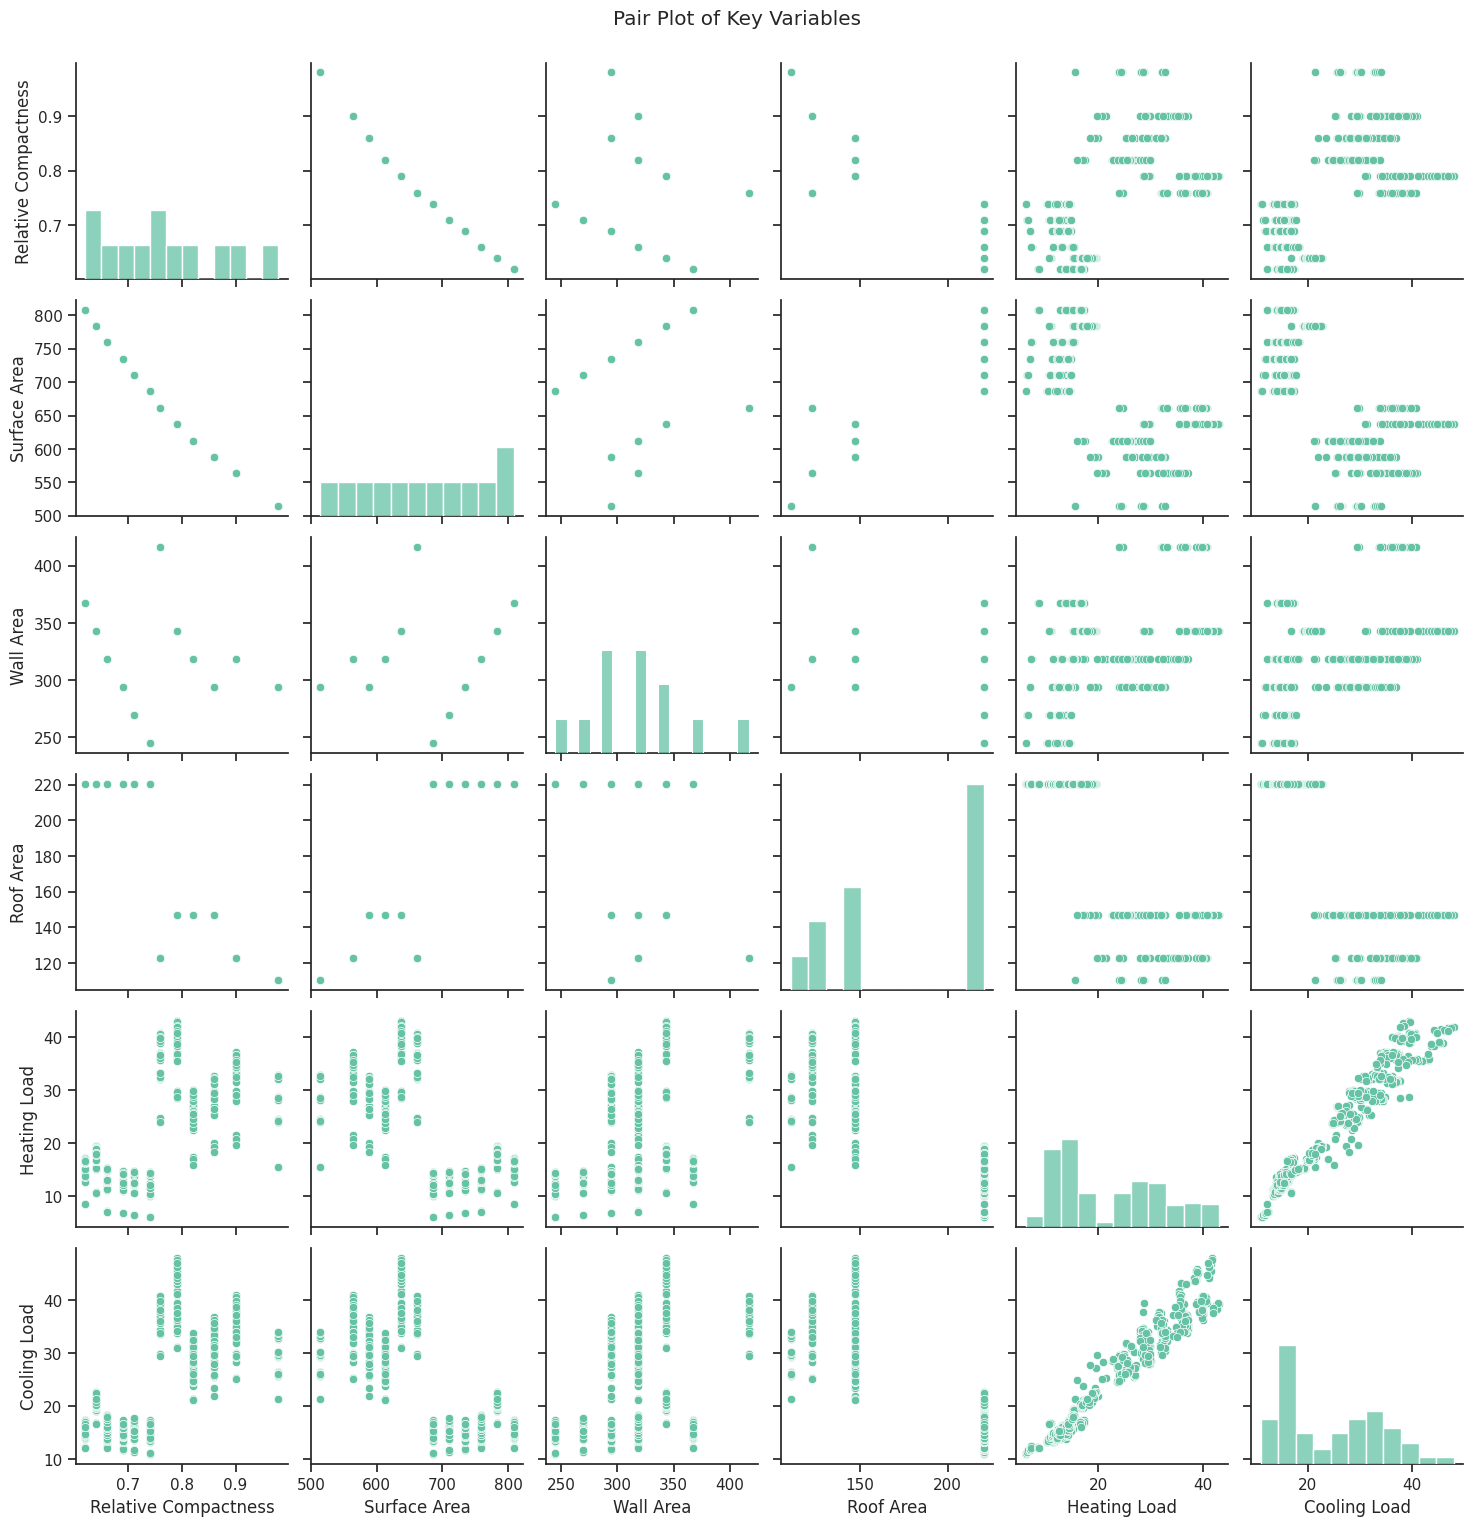

In [ ]:
sns.pairplot(data[[
    "Relative Compactness", "Surface Area", "Wall Area",
    "Roof Area", "Heating Load", "Cooling Load"
]], diag_kind="hist")
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()

## Data Preparation for Modeling

To ensure the dataset is ready for analysis, the following steps will be taken:

1. **Encoding Categorical Variables**:
   - `Orientation` and `Glazing Area Distribution` are categorical features that need to be encoded numerically.
   - One-hot encoding will be applied to avoid introducing ordinal bias.

2. **Creating Interaction Terms**:
   - Interaction terms (e.g., `Relative Compactness × Surface Area`) will be generated to capture combined effects between features.

3. **Splitting Data into Training and Testing Sets**:
   - The dataset will be split into 80% training and 20% testing data to ensure unbiased evaluation of models.


In [ ]:
data_encoded = pd.get_dummies(data, columns=["Orientation", "Glazing Area Distribution"], drop_first=True)

# here we create interaction terms.
data_encoded["Compactness_Surface_Interaction"] = (
    data_encoded["Relative Compactness"] * data_encoded["Surface Area"]
)
data_encoded["Wall_Roof_Interaction"] = (
    data_encoded["Wall Area"] * data_encoded["Roof Area"]
)

# now separating features (X) and target variables (y)
X = data_encoded.drop(columns=["Heating Load", "Cooling Load"])
y = data_encoded[["Heating Load", "Cooling Load"]]

In [ ]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (614, 16), (614, 2)
Testing set shape: (154, 16), (154, 2)


The next, faceted scatter plots are used to explore relationships between numerical features and target variables (Heating Load and Cooling Load) while considering the categorical variables (Orientation and Glazing Area Distribution). This helps uncover any patterns or interactions specific to certain categories.

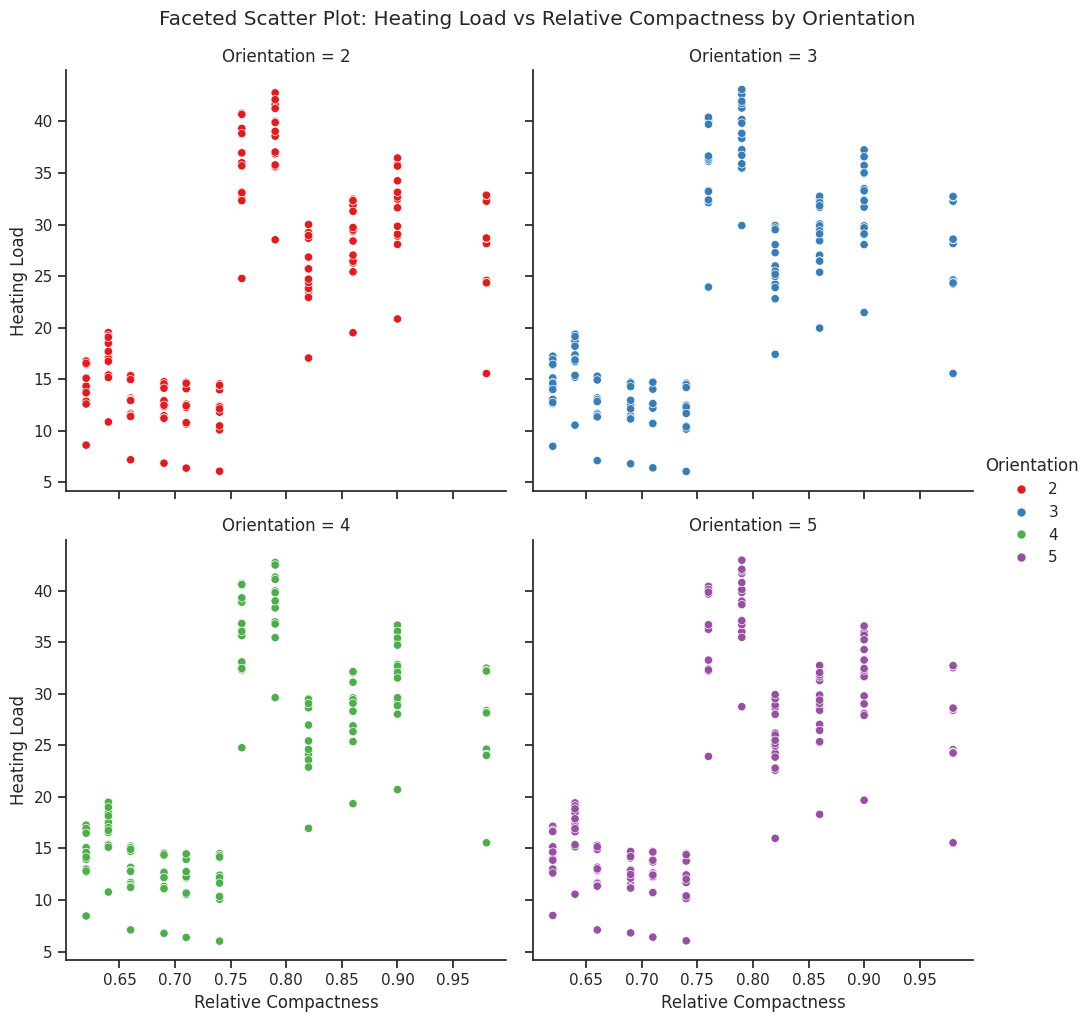

In [ ]:
# Facet scatter plots for Heating Load by Relative Compactness, faceted by Orientation
sns.relplot(
    data=data,
    x="Relative Compactness", y="Heating Load",
    col="Orientation", hue="Orientation",
    kind="scatter", col_wrap=2, palette="Set1"
)
plt.suptitle("Faceted Scatter Plot: Heating Load vs Relative Compactness by Orientation", y=1.02)
plt.show()

* As Relative Compactness increases, the heating load decreases across all orientations, highlighting that compact buildings are generally more energy-efficient for heating. Orientation appears to influence not only the heating load values but also their variability. For example, Orientation 5 exhibits the least variability, suggesting it provides more stable heating efficiency, while Orientations 2 and 3 show a wider range of heating loads, particularly at lower compactness levels. This indicates that Orientation plays a moderating role in heating efficiency.

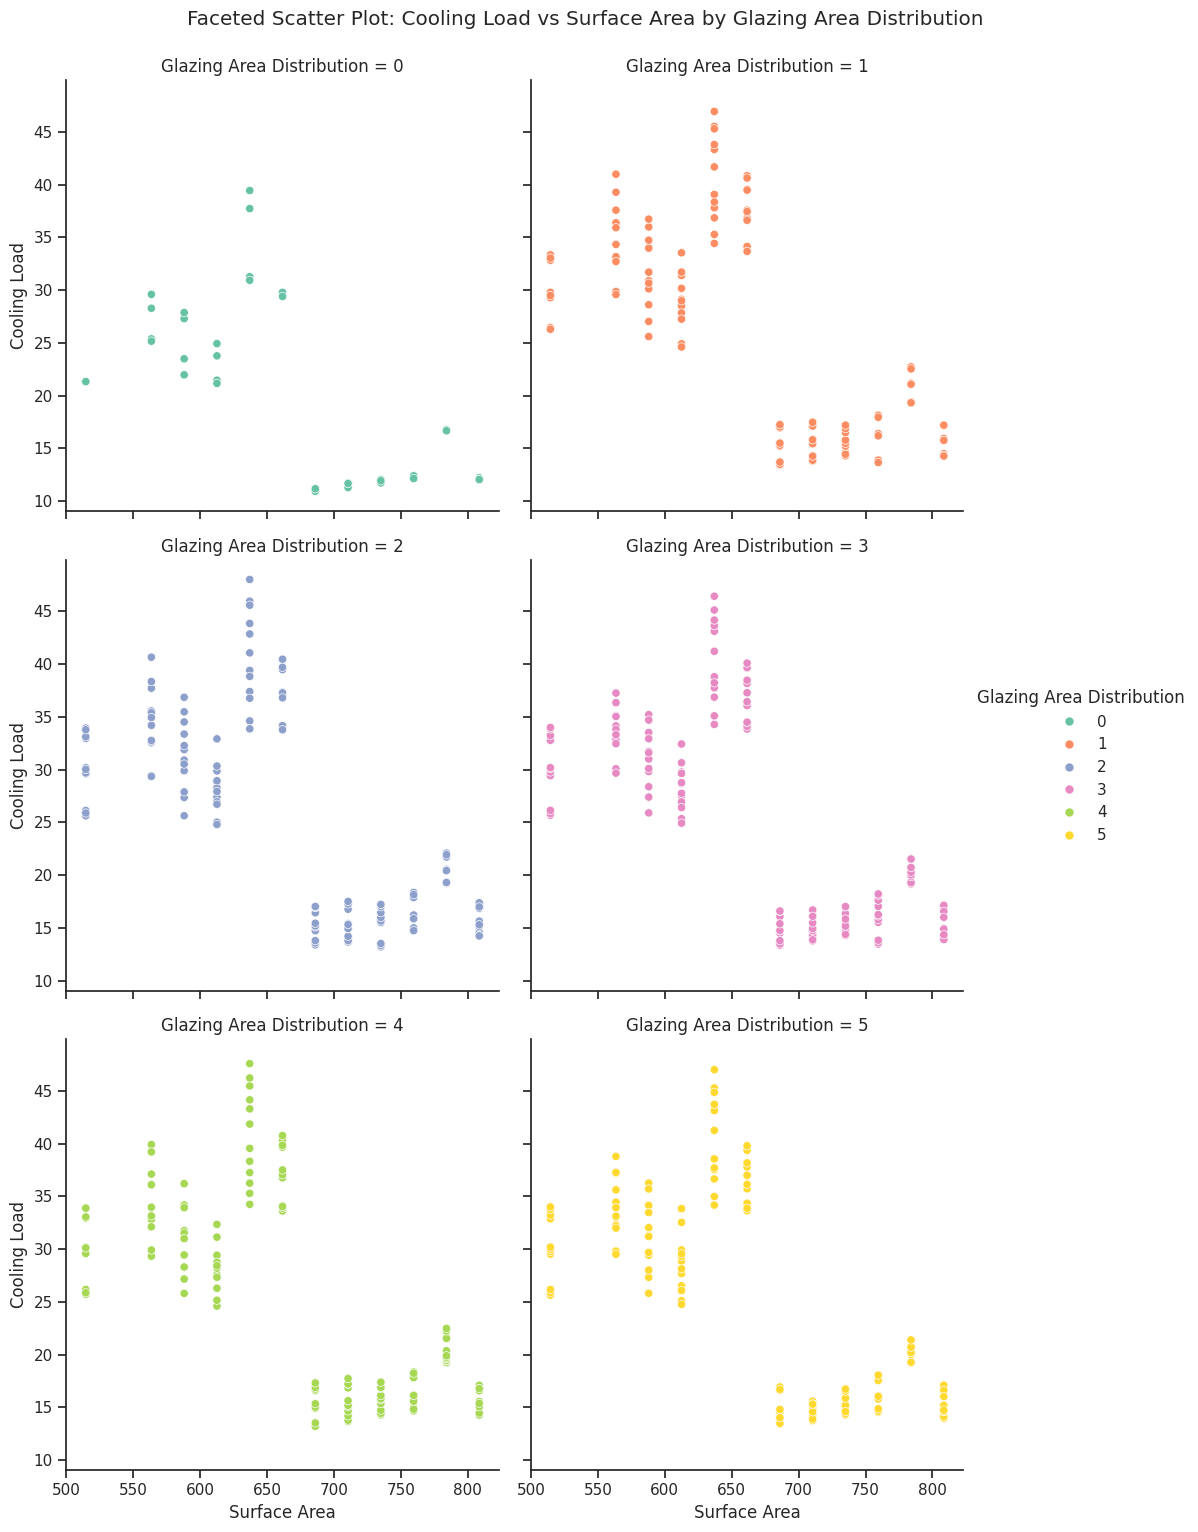

In [ ]:
# Facet scatter plots for Cooling Load by Surface Area, faceted by Glazing Area Distribution
sns.relplot(
    data=data,
    x="Surface Area", y="Cooling Load",
    col="Glazing Area Distribution", hue="Glazing Area Distribution",
    kind="scatter", col_wrap=2, palette="Set2"
)
plt.suptitle("Faceted Scatter Plot: Cooling Load vs Surface Area by Glazing Area Distribution", y=1.02)
plt.show()

* The cooling load exhibits a general trend of decreasing as surface area increases across all levels of glazing area distribution. However, the spread and variability of cooling load differ based on the glazing area distribution. For glazing area distribution levels 0 and 2, the cooling load is relatively stable, with a narrower range. As the glazing area distribution increases (e.g., 4 and 5), the variability of cooling load widens, particularly for smaller surface areas. This suggests that higher glazing area distribution amplifies the impact of surface area on cooling efficiency, highlighting a significant interaction between these two features.

## **Addressing Collinearity with Variance Inflation Factor (VIF)**

Collinearity occurs when independent variables are highly correlated with each other, leading to unstable model coefficients and difficulty in interpreting the results. To address this, we calculate the VIF for each feature. VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity.

- A VIF > 10 indicates significant multicollinearity and suggests that the corresponding variable should be removed from the model.
- Removing collinear variables ensures that the remaining features contribute uniquely to the model, improving stability and interpretability.

In this step, boolean variables are converted to integers to allow VIF calculation. We then remove variables with VIF > 10, keeping only those that are less collinear for modeling.

In [ ]:
import numpy as np

X_numeric = data_encoded.drop(columns=["Heating Load", "Cooling Load"])  # Exclude targets

print("Column Data Types:")
print(X_numeric.dtypes)

X_numeric_cleaned = X_numeric.apply(pd.to_numeric, errors="coerce")

print("\nChecking for NaN or infinite values:")
print(X_numeric_cleaned.isnull().sum())
print(np.isfinite(X_numeric_cleaned).all().all())

X_numeric_cleaned = X_numeric_cleaned.dropna()

Column Data Types:
Relative Compactness               float64
Surface Area                       float64
Wall Area                          float64
Roof Area                          float64
Overall Height                     float64
Glazing Area                       float64
Orientation_3                         bool
Orientation_4                         bool
Orientation_5                         bool
Glazing Area Distribution_1           bool
Glazing Area Distribution_2           bool
Glazing Area Distribution_3           bool
Glazing Area Distribution_4           bool
Glazing Area Distribution_5           bool
Compactness_Surface_Interaction    float64
Wall_Roof_Interaction              float64
dtype: object

Checking for NaN or infinite values:
Relative Compactness               0
Surface Area                       0
Wall Area                          0
Roof Area                          0
Overall Height                     0
Glazing Area                       0
Orientation_3      

In [ ]:
!pip install statsmodels


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_numeric_cleaned = X_numeric_cleaned.astype(int)

vif_data_cleaned = pd.DataFrame()
vif_data_cleaned["Variable"] = X_numeric_cleaned.columns
vif_data_cleaned["VIF"] = [variance_inflation_factor(X_numeric_cleaned.values, i) for i in range(X_numeric_cleaned.shape[1])]

print("\nVariance Inflation Factor (VIF) After Cleaning:")
print(vif_data_cleaned)


Variance Inflation Factor (VIF) After Cleaning:
                           Variable           VIF
0              Relative Compactness           NaN
1                      Surface Area  9.909471e+06
2                         Wall Area  2.294941e+06
3                         Roof Area  2.878599e+06
4                    Overall Height  2.871573e+02
5                      Glazing Area           NaN
6                     Orientation_3  1.999977e+00
7                     Orientation_4  1.999977e+00
8                     Orientation_5  1.999977e+00
9       Glazing Area Distribution_1  3.999729e+00
10      Glazing Area Distribution_2  3.999729e+00
11      Glazing Area Distribution_3  3.999729e+00
12      Glazing Area Distribution_4  3.999729e+00
13      Glazing Area Distribution_5  3.999729e+00
14  Compactness_Surface_Interaction  1.648955e+03
15            Wall_Roof_Interaction  1.172265e+03


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
X_reduced = X_numeric_cleaned.drop(columns=vif_data_cleaned[vif_data_cleaned["VIF"] > 10]["Variable"].tolist(), errors="ignore")

print("\nRemaining Variables After Addressing Collinearity:")
print(X_reduced.columns)


Remaining Variables After Addressing Collinearity:
Index(['Relative Compactness', 'Glazing Area', 'Orientation_3',
       'Orientation_4', 'Orientation_5', 'Glazing Area Distribution_1',
       'Glazing Area Distribution_2', 'Glazing Area Distribution_3',
       'Glazing Area Distribution_4', 'Glazing Area Distribution_5'],
      dtype='object')


## **Analysis of VIF Results**

The VIF analysis revealed significant collinearity among several variables:
- Features such as `Surface Area`, `Wall Area`, `Roof Area`, and interaction terms exhibited extremely high VIF values (e.g., `Surface Area`: 9.91×10⁶), indicating severe multicollinearity.
- Categorical variables (e.g., `Orientation` and `Glazing Area Distribution`) and a few continuous variables (e.g., `Relative Compactness`) showed acceptable VIF values (< 10).

### **Remaining Variables**
After removing highly collinear features, the following variables remain:
- `Relative Compactness` and `Glazing Area` (key continuous variables).
- Encoded categorical variables for `Orientation` and `Glazing Area Distribution`.

By reducing collinearity, the dataset is now ready for modeling with a cleaner feature set that ensures better interpretability and model stability.


## **Exploring Nonlinear Relationships**

The scatterplot matrix showed complex, nonlinear relationships between some variables. Linear models assume a straight-line relationship, but if key predictors exhibit curvature, their effects may not be adequately captured without transformation.

### **Goals**
1. Plot scatter plots with regression curves to detect nonlinearity in relationships between predictors and target variables.
2. Identify potential transformations for variables showing significant nonlinear behavior to improve model accuracy and interpretability.


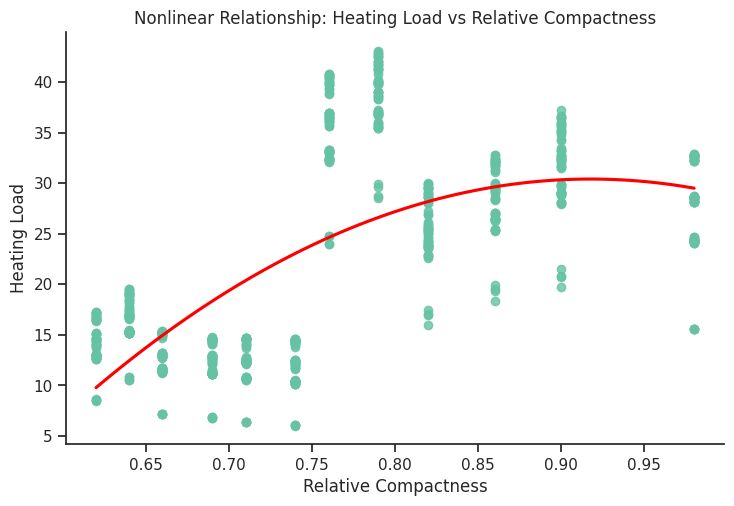

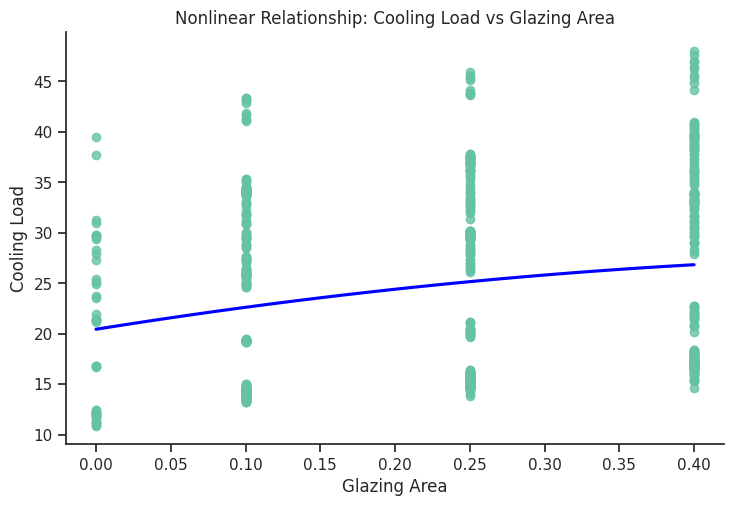

In [ ]:
sns.lmplot(
    data=data, x="Relative Compactness", y="Heating Load",
    order=2, ci=None, line_kws={"color": "red"}, height=5, aspect=1.5
)
plt.title("Nonlinear Relationship: Heating Load vs Relative Compactness")
plt.show()

sns.lmplot(
    data=data, x="Glazing Area", y="Cooling Load",
    order=2, ci=None, line_kws={"color": "blue"}, height=5, aspect=1.5
)
plt.title("Nonlinear Relationship: Cooling Load vs Glazing Area")
plt.show()

* The plots reveal interesting patterns in the relationships between key predictors and target variables. For Heating Load, there’s a clear nonlinear trend with Relative Compactness: as compactness increases, the heating load initially rises, peaks around 0.8, and then gradually decreases. This suggests that compactness improves heating efficiency after a certain threshold. For Cooling Load, the relationship with Glazing Area appears to be more subtle, with a slight upward trend. This indicates that as the glazing area increases, cooling loads might increase slightly due to higher heat gain, but the effect is not as pronounced as for Heating Load. These observations highlight the need to account for nonlinear interactions in the modeling process.

## **Transforming Variables to Address Nonlinearity**

Nonlinear relationships observed in the previous step (e.g., Heating Load vs Relative Compactness) indicate that simple linear terms may not fully capture the effect of certain predictors. To account for these complexities:
1. Polynomial transformations will be applied to key features, such as squaring `Relative Compactness` to model its curvilinear relationship with Heating Load.
2. Interaction terms will be added to capture the combined effects of multiple variables (e.g., `Relative Compactness × Glazing Area`).


In [ ]:
# Add polynomial features
data_encoded["Relative Compactness^2"] = data_encoded["Relative Compactness"] ** 2
data_encoded["Glazing Area^2"] = data_encoded["Glazing Area"] ** 2

# Add interaction terms
data_encoded["Compactness_Glazing_Interaction"] = (
    data_encoded["Relative Compactness"] * data_encoded["Glazing Area"]
)
data_encoded["Surface_Compactness_Interaction"] = (
    data_encoded["Surface Area"] * data_encoded["Relative Compactness"]
)

print("Updated dataset with polynomial and interaction terms:")
print(data_encoded.head())

Updated dataset with polynomial and interaction terms:
   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Glazing Area  Heating Load  Cooling Load  Orientation_3  Orientation_4  \
0           0.0         15.55         21.33          False          False   
1           0.0         15.55         21.33           True          False   
2           0.0         15.55         21.33          False           True   
3           0.0         15.55         21.33          False          False   
4           0.0         20.84         28.28          False          False   

   ... 

## **Linear Regression: Modeling Heating and Cooling Loads**

With the updated dataset, we will now fit a linear regression model to predict `Heating Load` and `Cooling Load`. The model will:
1. Quantify the relationships between predictors and target variables.
2. Identify statistically significant predictors using p-values and confidence intervals.
3. Evaluate model performance using metrics like Mean Squared Error (MSE) and R-squared (R²).

This analysis will provide insights into which features most influence energy efficiency and the magnitude of their effects.


In [ ]:
import statsmodels.api as sm

X_heating = data_encoded.drop(columns=["Heating Load", "Cooling Load"])  # Drop target variables
y_heating = data_encoded["Heating Load"]

X_heating = X_heating.applymap(lambda x: int(x) if isinstance(x, bool) else x)

X_heating = X_heating.apply(pd.to_numeric, errors="coerce")
y_heating = y_heating.astype(float)

X_heating_const = sm.add_constant(X_heating)


<ipython-input-22-6daa87f11fb6>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_heating = X_heating.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

model_heating = sm.OLS(y_heating, X_heating_const).fit()

print("Linear Regression Results for Heating Load:")
print(model_heating.summary())

y_heating_pred = model_heating.predict(X_heating_const)
mse_heating = mean_squared_error(y_heating, y_heating_pred)
r2_heating = r2_score(y_heating, y_heating_pred)

print("\nModel Performance Metrics for Heating Load:")
print(f"Mean Squared Error (MSE): {mse_heating:.2f}")
print(f"R-squared (R²): {r2_heating:.2f}")

Linear Regression Results for Heating Load:
                            OLS Regression Results                            
Dep. Variable:           Heating Load   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     737.5
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:39:45   Log-Likelihood:                -1739.5
No. Observations:                 768   AIC:                             3517.
Df Residuals:                     749   BIC:                             3605.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

**Model Fit**:

* The model demonstrates a strong fit with an R-squared value of 0.95, indicating that 95% of the variance in Heating Load is explained by the predictors.
* The Mean Squared Error (MSE) of 5.43 reflects good predictive accuracy.
Key Predictors:

**Statistically Significant Variables**:
* Relative Compactness (negative impact) and Relative Compactness² (positive impact), confirming the nonlinear relationship observed earlier.
* Interaction terms like Compactness_Surface_Interaction and Compactness_Glazing_Interaction are significant, highlighting combined effects.
Glazing Area Distribution levels (1–5) significantly impact heating load.
Insignificant Variables:
* Orientation variables (Orientation_3, Orientation_4, Orientation_5) and Glazing Area² are not statistically significant, suggesting minimal or no influence on Heating Load.

**Potential Concerns**:

* The high condition number (Cond. No. = 1.23e+18) and smallest eigenvalue suggest potential multicollinearity or issues with the design matrix. This may require further variable reduction or regularization techniques.
* The Durbin-Watson statistic (0.698) indicates possible autocorrelation in residuals, which should be investigated further.

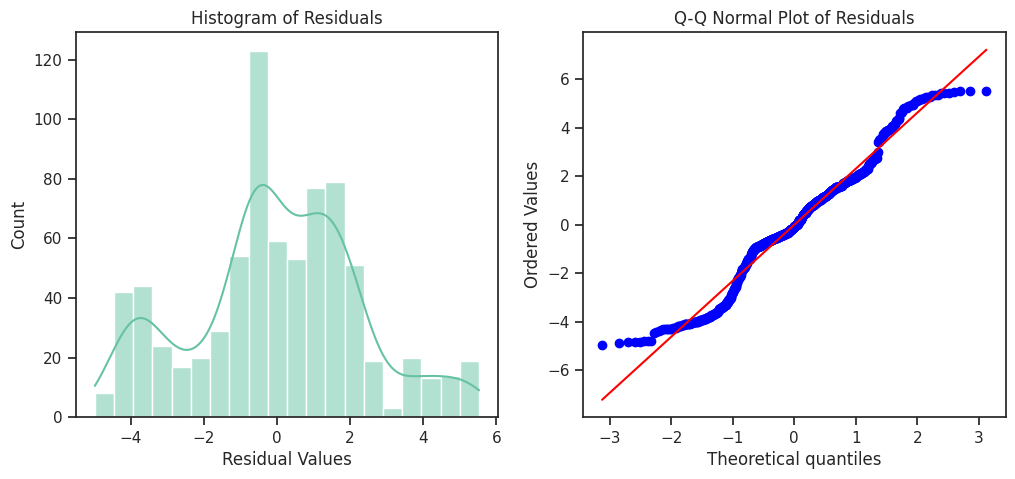

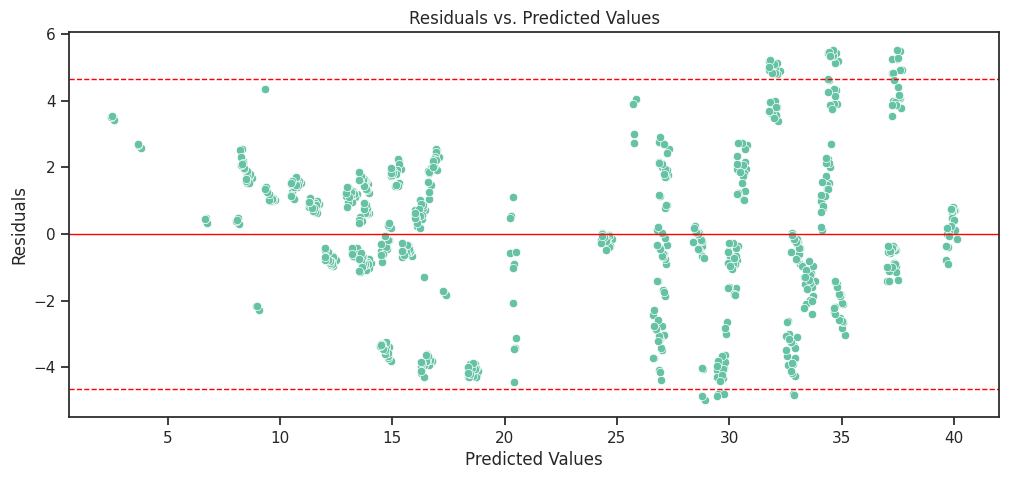

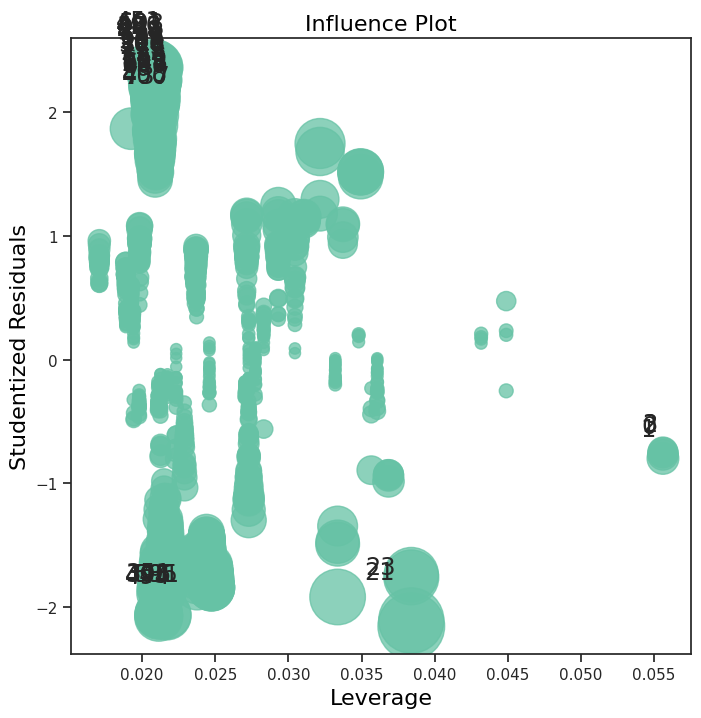

In [ ]:
# Calculate residuals
residuals_heating = y_heating - y_heating_pred

import statsmodels.api as sm
import scipy.stats as ss
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_resid_dist(resids):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    sns.histplot(resids, bins=20, kde=True, ax=ax[0])
    ax[0].set_title('Histogram of Residuals')
    ax[0].set_xlabel('Residual Values')
    ss.probplot(resids, plot=ax[1])
    ax[1].set_title('Q-Q Normal Plot of Residuals')
    plt.show()

def residual_plot(df, predicted='predicted', resids='resids'):
    fig, ax = plt.subplots(figsize=(12, 5))
    RMSE = np.std(df.loc[:, resids])
    sns.scatterplot(x=predicted, y=resids, data=df, ax=ax)
    ax.axhline(0.0, color='red', linewidth=1.0)
    ax.axhline(2.0 * RMSE, color='red', linestyle='dashed', linewidth=1.0)
    ax.axhline(-2.0 * RMSE, color='red', linestyle='dashed', linewidth=1.0)
    ax.set_title('Residuals vs. Predicted Values')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    plt.show()

df_heating = X_heating_const.copy()
df_heating['predicted'] = model_heating.predict(X_heating_const)
df_heating['resids'] = y_heating - df_heating['predicted']

# Residual Diagnostics
plot_resid_dist(df_heating['resids'])
residual_plot(df_heating, predicted='predicted', resids='resids')

# Leverage Influence Plot for Outlier Detection
fig, ax = plt.subplots(figsize=(8, 8))
_=sm.graphics.influence_plot(model_heating, ax=ax)

In [ ]:
# Apply log transformation to the dependent variable
import numpy as np
y_heating_log = np.log(y_heating)

model_heating_log = sm.OLS(y_heating_log, X_heating_const).fit()

print("Linear Regression Results for Log-Transformed Heating Load:")
print(model_heating_log.summary())

y_heating_log_pred = model_heating_log.predict(X_heating_const)
residuals_heating_log = y_heating_log - y_heating_log_pred

Linear Regression Results for Log-Transformed Heating Load:
                            OLS Regression Results                            
Dep. Variable:           Heating Load   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1055.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:40:23   Log-Likelihood:                 736.13
No. Observations:                 768   AIC:                            -1434.
Df Residuals:                     749   BIC:                            -1346.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

Residual Diagnostics for Log-Transformed Heating Load:


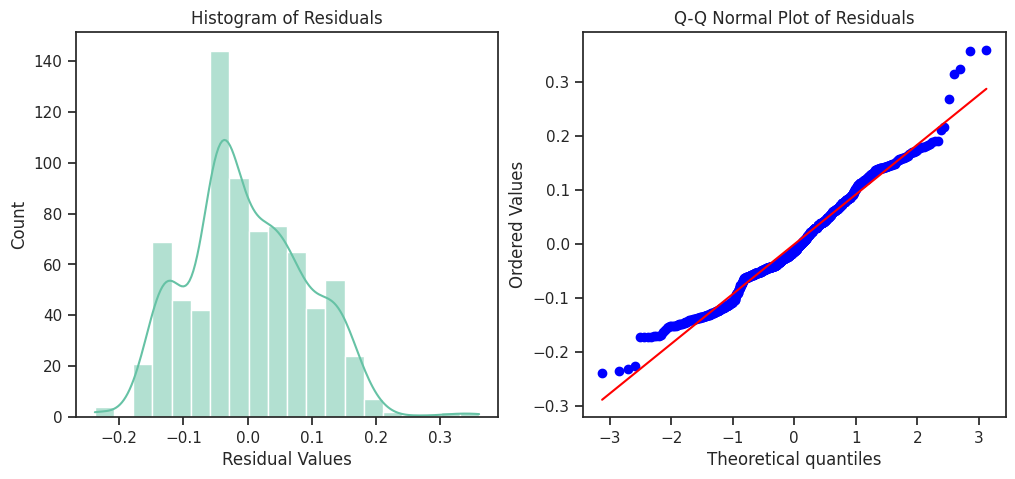

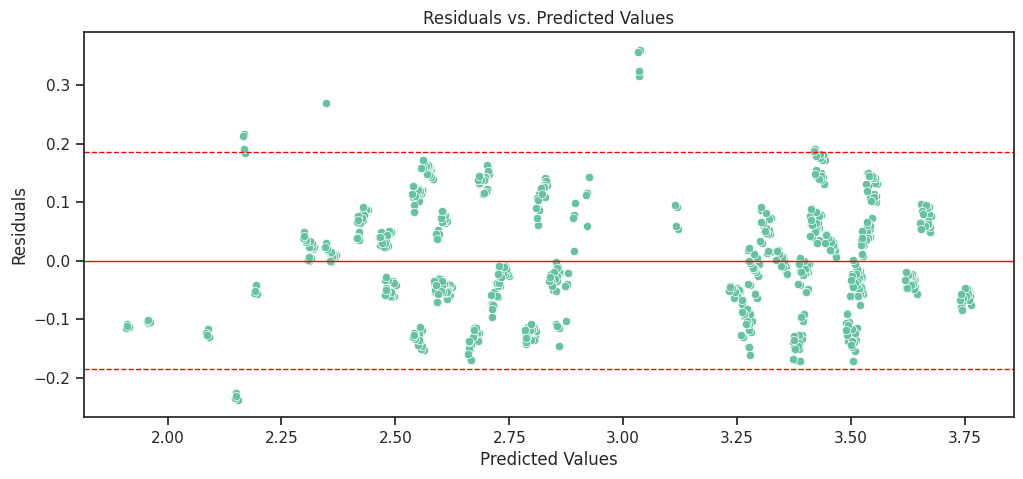

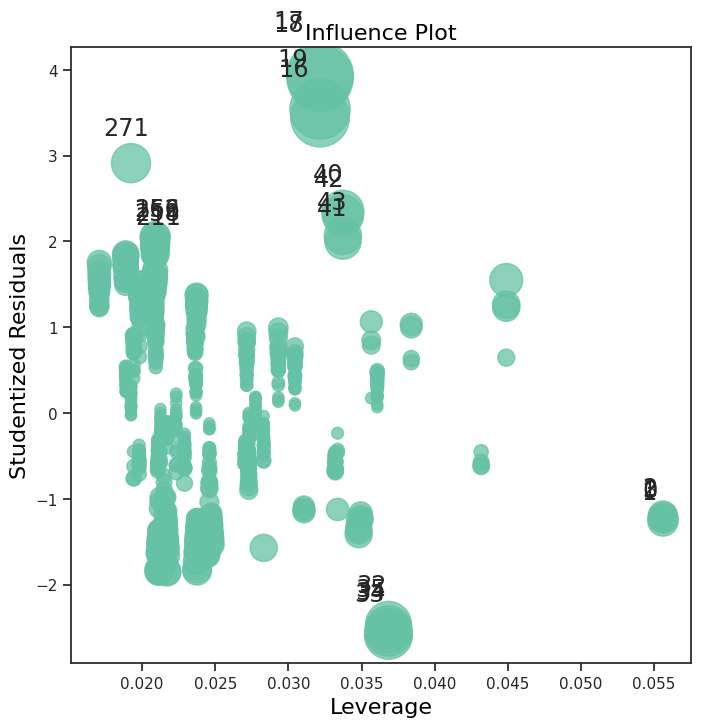

In [ ]:
# Calculate predicted values and residuals for the log-transformed Heating Load
df_heating_log = X_heating_const.copy()
df_heating_log['predicted'] = y_heating_log_pred
df_heating_log['resids'] = residuals_heating_log

print("Residual Diagnostics for Log-Transformed Heating Load:")
plot_resid_dist(df_heating_log['resids'])
residual_plot(df_heating_log, predicted='predicted', resids='resids')
fig, ax = plt.subplots(figsize=(8, 8))
_=sm.graphics.influence_plot(model_heating_log, ax=ax)

## **Analysis of Log-Transformed Heating Load Model**

**Model Fit:**

The log-transformed model has an R-squared value of 0.962, indicating a slight improvement in fit compared to the original model (R² = 0.947).
The AIC (-1434) and BIC (-1346) are significantly lower than in the original model, suggesting improved model efficiency.

**Residual Distribution**: The histogram of residuals for the log-transformed model shows better symmetry and aligns more closely with a normal distribution compared to the original model.

**Residuals vs Fitted Values**: There is still some clustering and heteroscedasticity, though the residual spread is reduced compared to the original model.

**Significant variables include:**

Relative Compactness and its square (Relative Compactness^2), confirming the importance of the nonlinear relationship.
Interaction terms like Compactness_Surface_Interaction and Surface_Compactness_Interaction.
Glazing Area Distribution levels (1-5), which remain highly significant.
Insignificant variables include:
Orientation variables (Orientation_3, Orientation_4, Orientation_5).
Glazing Area^2 and Compactness_Glazing_Interaction.
Concerns:

Multicollinearity: The condition number remains very high (Cond. No. = 1.23e+18), indicating potential multicollinearity issues in the predictors.
The Durbin-Watson statistic (0.678) still suggests residual autocorrelation.

In [ ]:
X_cooling = X_heating_const
y_cooling = data_encoded["Cooling Load"]

model_cooling = sm.OLS(y_cooling, X_cooling).fit()

print("Linear Regression Results for Cooling Load:")
print(model_cooling.summary())

Linear Regression Results for Cooling Load:
                            OLS Regression Results                            
Dep. Variable:           Cooling Load   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     447.8
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:40:56   Log-Likelihood:                -1872.8
No. Observations:                 768   AIC:                             3784.
Df Residuals:                     749   BIC:                             3872.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

* The Cooling Load model shows a strong fit, explaining 91.5% of the variance with an R-squared value of 0.915. Key predictors include Relative Compactness (and its square), interaction terms like Compactness_Surface_Interaction, and Glazing Area Distribution levels, all of which significantly impact Cooling Load. However, orientation variables and Glazing Area² are insignificant. Despite the model's performance, the high condition number suggests multicollinearity issues, and the residual diagnostics indicate deviations from normality and possible autocorrelation.

Residual Diagnostics for Cooling Load:


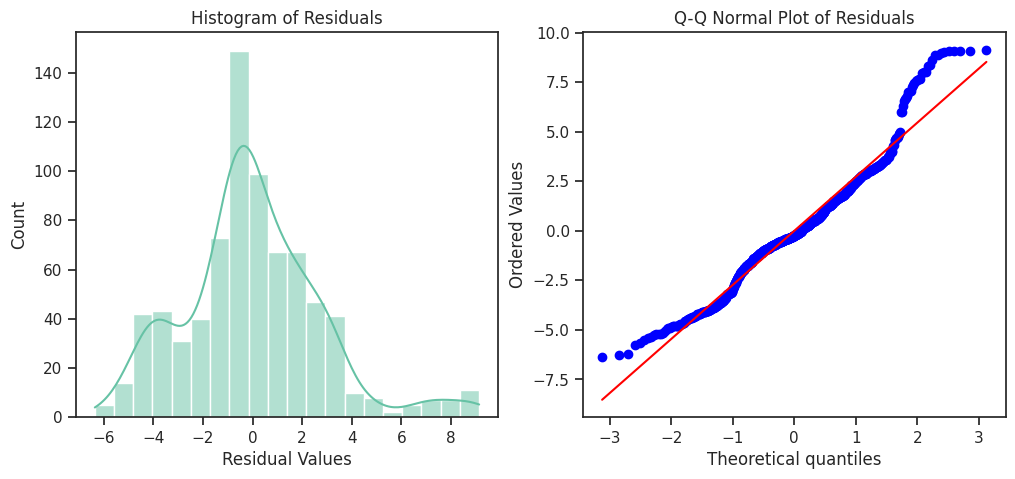

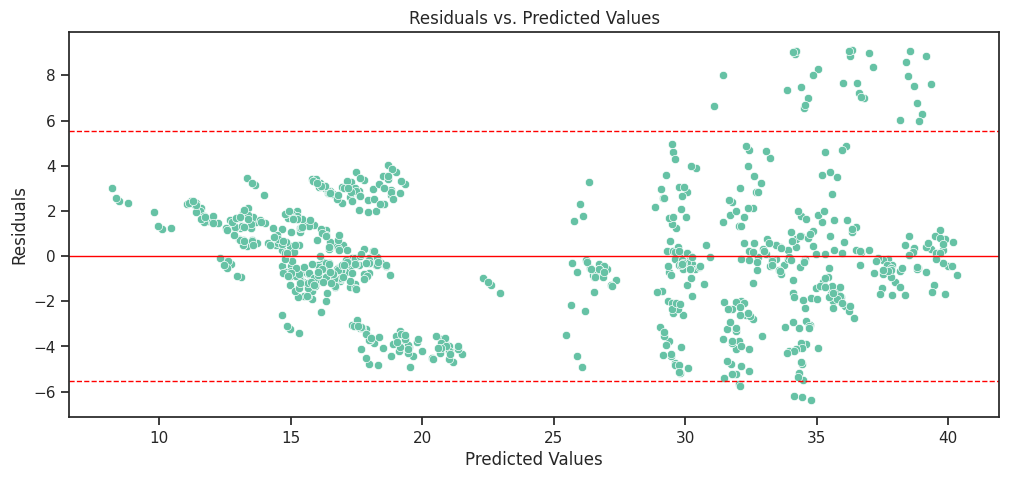

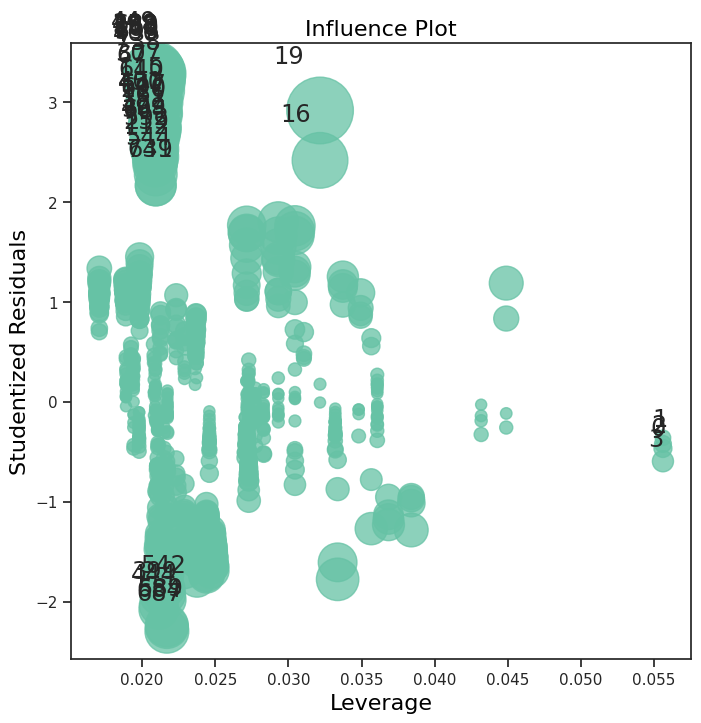

In [ ]:
y_cooling_pred = model_cooling.predict(X_cooling)
residuals_cooling = y_cooling - y_cooling_pred

df_cooling = X_cooling.copy()
df_cooling['predicted'] = y_cooling_pred
df_cooling['resids'] = residuals_cooling

print("Residual Diagnostics for Cooling Load:")
plot_resid_dist(df_cooling['resids'])
residual_plot(df_cooling, predicted='predicted', resids='resids')
fig, ax = plt.subplots(figsize=(8, 8))
_=sm.graphics.influence_plot(model_cooling, ax=ax)

* The residual diagnostics for the Cooling Load model:

* Residual Distribution: The histogram shows a roughly normal distribution but with slight skewness and heavy tails, confirmed by the Q-Q plot where deviations are evident at the extremes.
Residuals vs Predicted Values: The scatter plot indicates non-random patterns, suggesting potential heteroscedasticity and the need for further refinement.
Influence Plot: A few points have high leverage and influence, which may disproportionately affect the model and warrant further investigation or removal.

Linear Regression Results for Log-Transformed Cooling Load:
                            OLS Regression Results                            
Dep. Variable:           Cooling Load   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     607.2
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:42:38   Log-Likelihood:                 683.29
No. Observations:                 768   AIC:                            -1329.
Df Residuals:                     749   BIC:                            -1240.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

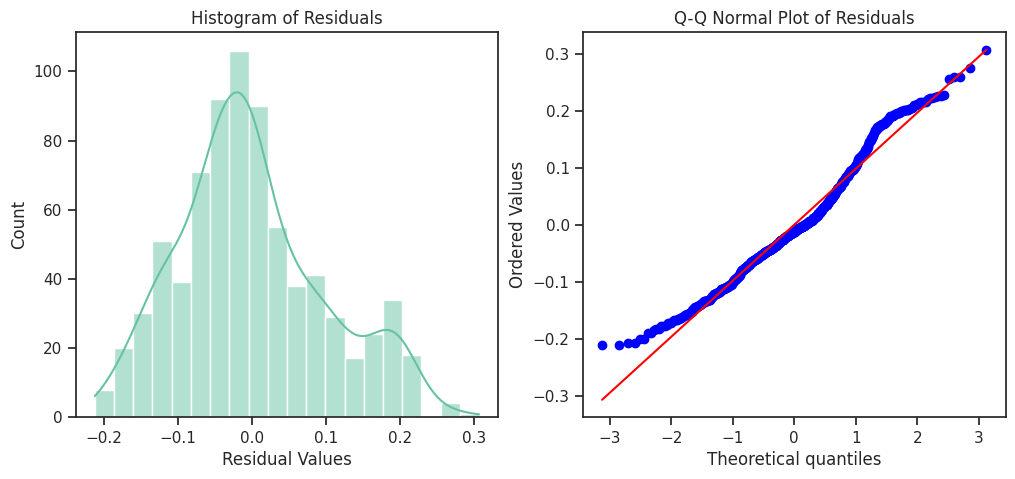

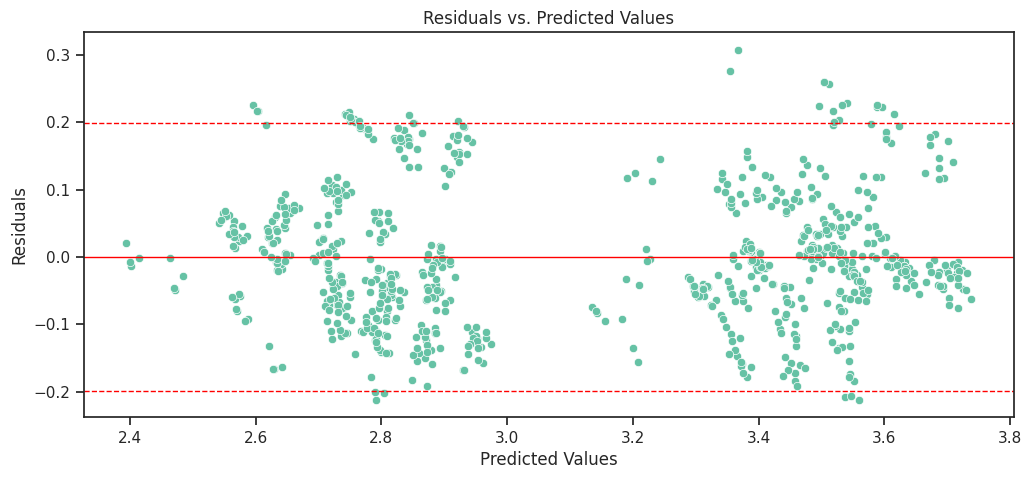

In [ ]:
y_cooling_log = np.log(y_cooling)
model_cooling_log = sm.OLS(y_cooling_log, X_cooling).fit()

print("Linear Regression Results for Log-Transformed Cooling Load:")
print(model_cooling_log.summary())
y_cooling_log_pred = model_cooling_log.predict(X_cooling)
residuals_cooling_log = y_cooling_log - y_cooling_log_pred

df_cooling_log = X_cooling.copy()
df_cooling_log['predicted'] = y_cooling_log_pred
df_cooling_log['resids'] = residuals_cooling_log

print("Residual Diagnostics for Log-Transformed Cooling Load:")
plot_resid_dist(df_cooling_log['resids'])
residual_plot(df_cooling_log, predicted='predicted', resids='resids')

* The log-transformed Cooling Load model performs well, with an R-squared value of 0.936, explaining 93.6% of the variance. Significant predictors include Relative Compactness, interaction terms, and Glazing Area Distribution. The residuals show improved normality in the histogram and Q-Q plot, but slight heteroscedasticity remains in the residuals vs predicted plot. The influence plot highlights a few high-leverage points, suggesting the need for further investigation. Overall, the transformation improves model performance and residual behavior, but additional refinement may still be necessary.

## **Bayesian Analysis for Heating and Cooling Loads**

This section uses Bayesian modeling to analyze `Heating Load` and `Cooling Load`. Priors are set for the intercept, coefficients, and residual variance, with a log transformation applied to the target variables to address heteroscedasticity. The model samples posterior distributions to identify significant predictors and quantify uncertainty using 95% HDI. A posterior predictive check (PPC) validates the model by comparing observed and predicted distributions to assess its accuracy.

In [ ]:
import statsmodels.api as sm

refined_predictors = [
    "Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
    "Overall Height", "Glazing Area", "Glazing Area Distribution_1",
    "Glazing Area Distribution_2", "Glazing Area Distribution_3",
    "Glazing Area Distribution_4", "Glazing Area Distribution_5",
    "Compactness_Surface_Interaction", "Surface_Compactness_Interaction",
    "Relative Compactness^2"
]

X_heating_refined = X_heating[refined_predictors]
X_heating_refined_const = sm.add_constant(X_heating_refined)

Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


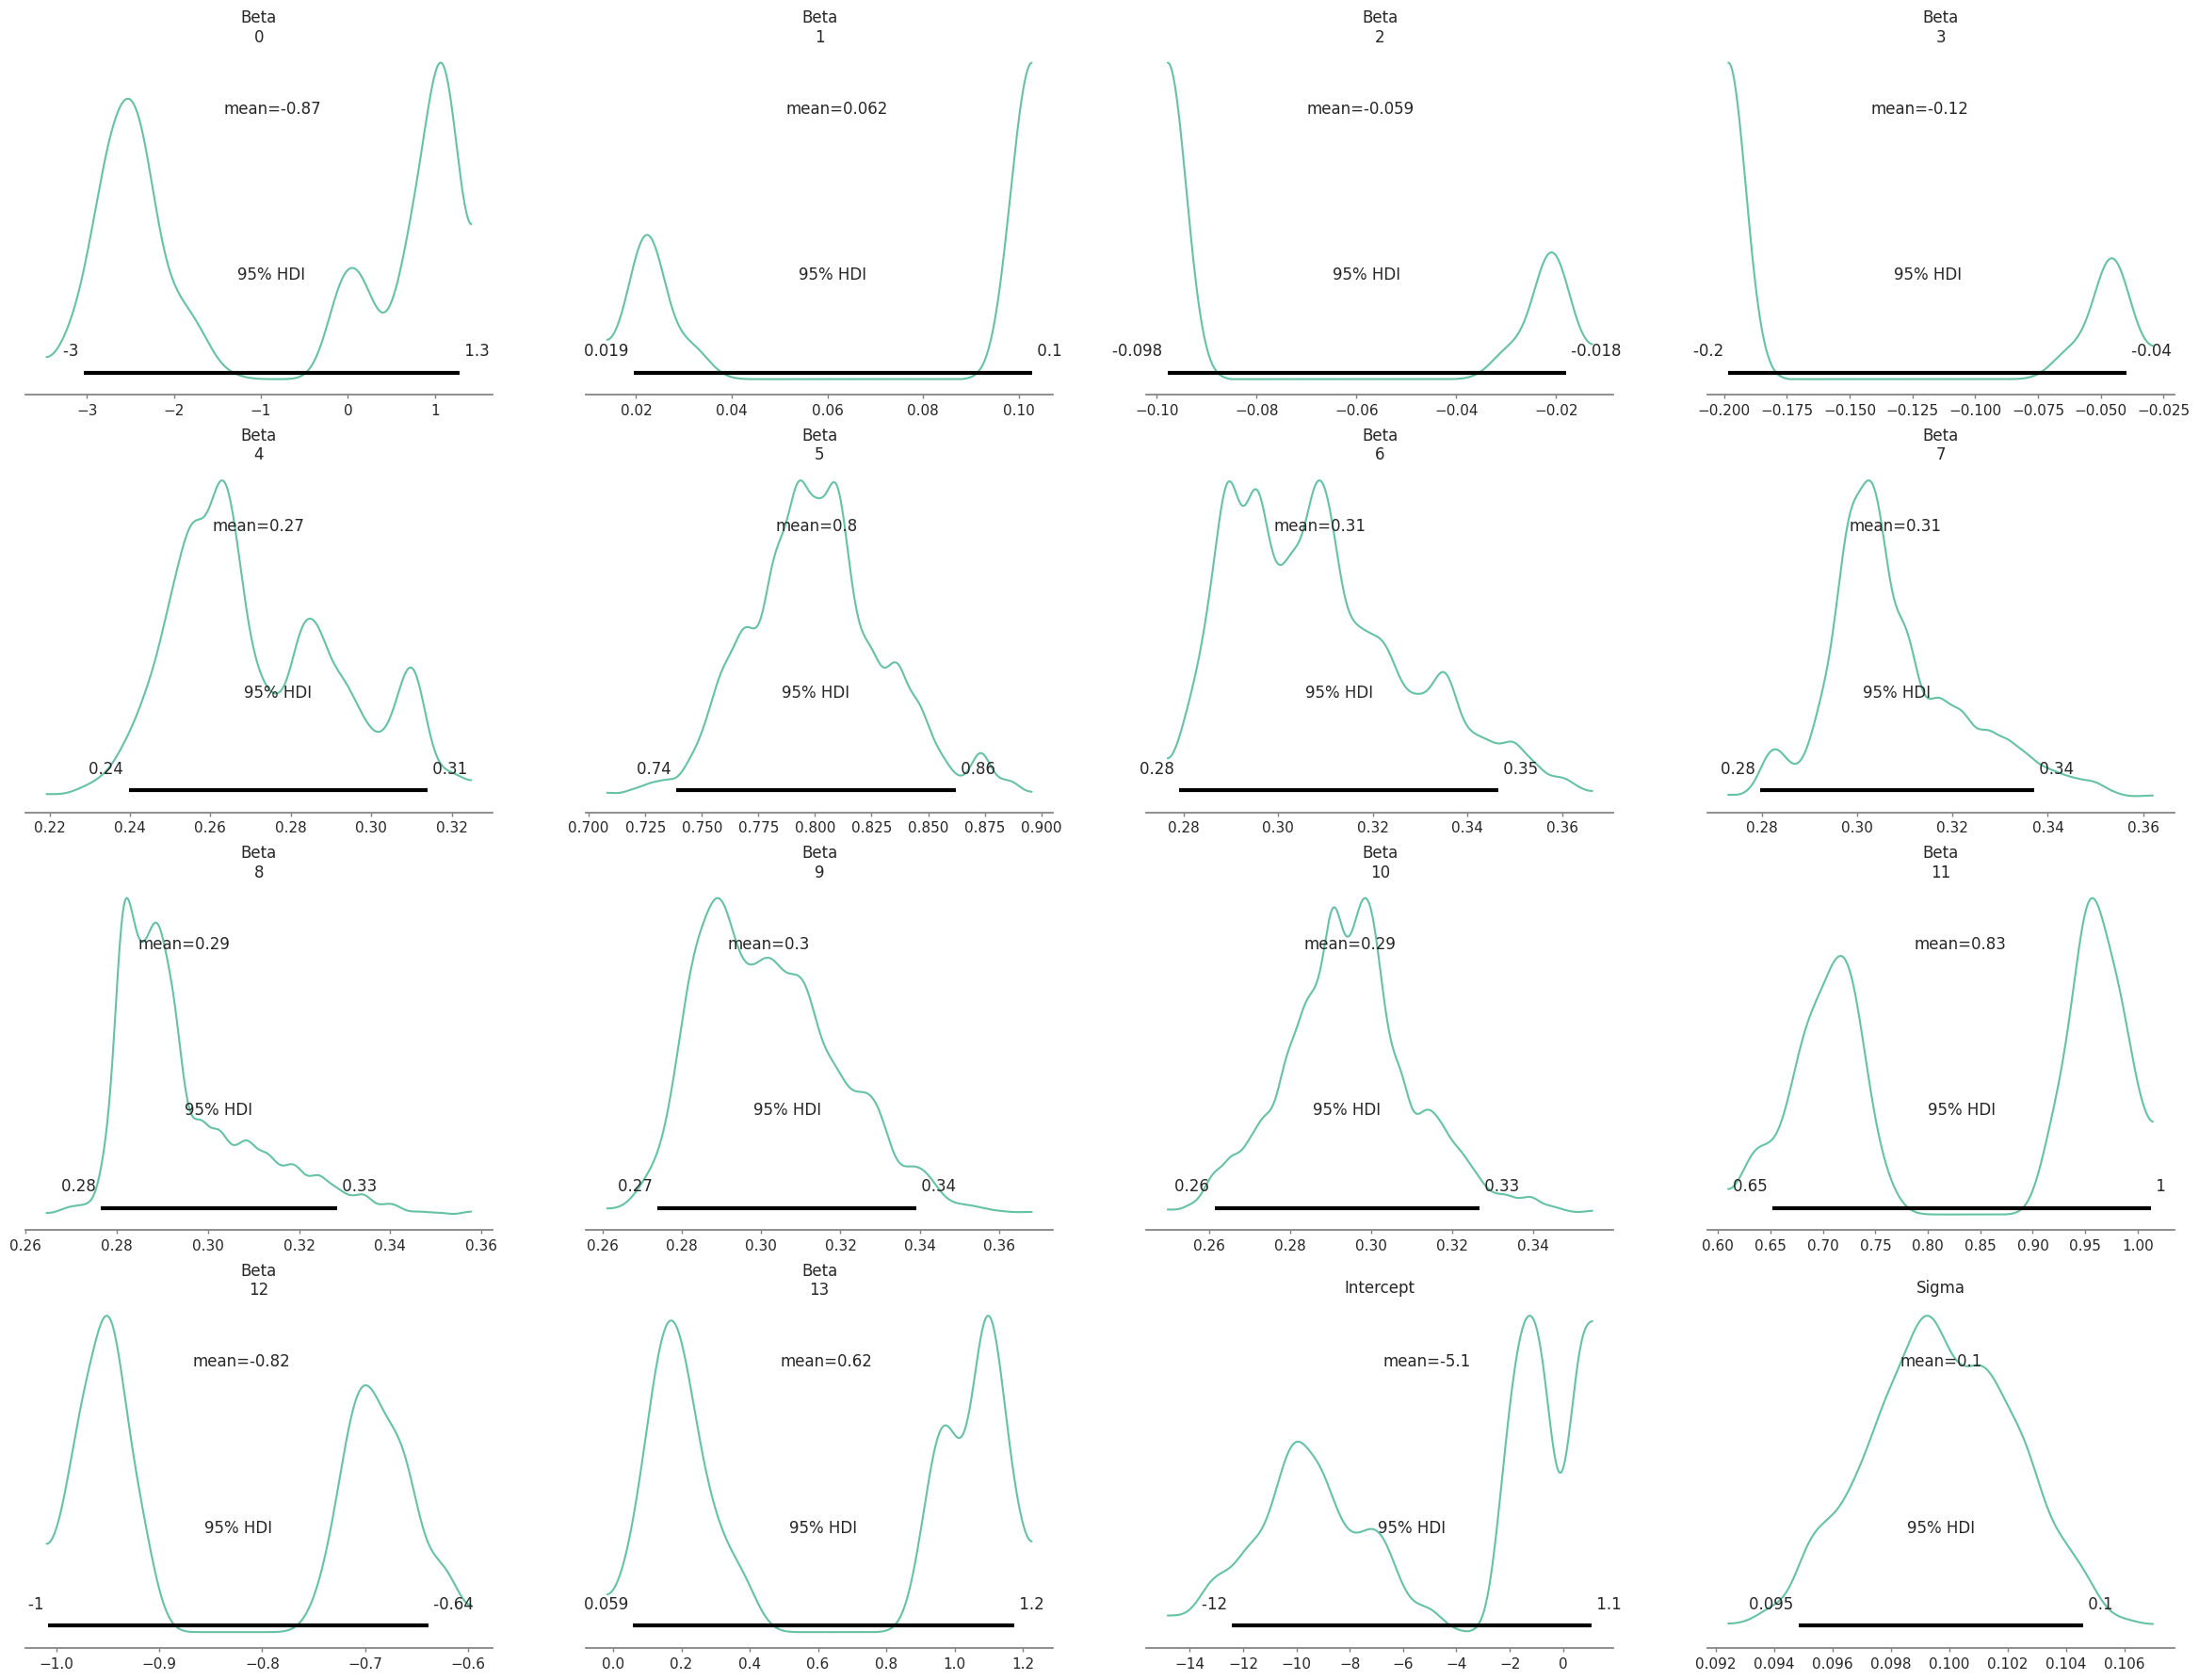

Output()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


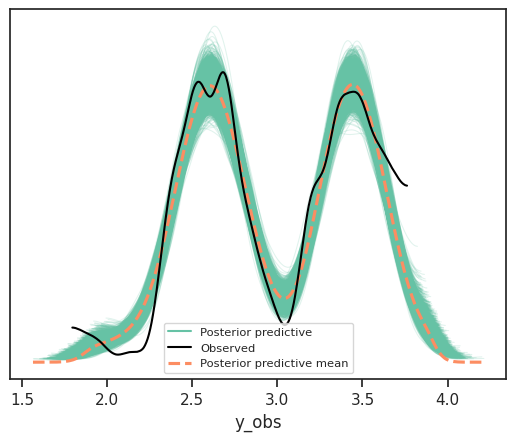

In [ ]:
import pymc as pm
import arviz as az

num_predictors = X_heating_refined_const.shape[1] - 1

with pm.Model() as bayesian_model_heating:
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    beta = pm.Normal("Beta", mu=0, sigma=10, shape=num_predictors)
    sigma = pm.HalfNormal("Sigma", sigma=1)

    mu = intercept + pm.math.dot(X_heating_refined_const.iloc[:, 1:], beta)

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=np.log(y_heating))

    trace_heating = pm.sample(2000, return_inferencedata=True)

az.plot_posterior(trace_heating, hdi_prob=0.95)
plt.show()

with bayesian_model_heating:
    ppc_heating = pm.sample_posterior_predictive(trace_heating)
az.plot_ppc(ppc_heating)
plt.show()

### Posterior Distributions
The posterior distributions for the model parameters show the mean values and 95% HDI for each coefficient. Predictors with narrow distributions and HDIs far from zero indicate stronger effects, while those with wide distributions or HDIs including zero suggest weak or insignificant contributions.

### Posterior Predictive Check (PPC)
The PPC plot shows good alignment between the posterior predictive distributions and observed data. The predicted mean (dashed line) closely follows the observed trend, indicating that the model captures the overall behavior well.

### The next steps is to refine the model
1. Identify predictors with weak effects (HDI includes zero) and consider removing them to simplify the model.
2. Refit the model with reduced predictors to improve efficiency and focus on significant variables.
3. Perform a similar analysis for `Cooling Load` to compare results and finalize insights.

In [ ]:
# Summarize key statistics for posterior distributions
posterior_summary = az.summary(trace_heating)
print(posterior_summary)

            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Beta[0]   -0.866  1.681  -2.984    1.283      1.168    0.982       3.0   
Beta[1]    0.062  0.039   0.020    0.103      0.027    0.023       2.0   
Beta[2]   -0.059  0.037  -0.098   -0.018      0.026    0.022       2.0   
Beta[3]   -0.122  0.074  -0.198   -0.040      0.052    0.044       2.0   
Beta[4]    0.272  0.021   0.241    0.314      0.013    0.011       3.0   
Beta[5]    0.801  0.030   0.742    0.857      0.007    0.005      18.0   
Beta[6]    0.309  0.019   0.279    0.344      0.010    0.008       4.0   
Beta[7]    0.308  0.014   0.280    0.336      0.006    0.005       5.0   
Beta[8]    0.295  0.015   0.277    0.326      0.007    0.005       5.0   
Beta[9]    0.302  0.018   0.270    0.333      0.009    0.006       4.0   
Beta[10]   0.295  0.016   0.264    0.327      0.006    0.005       7.0   
Beta[11]   0.831  0.133   0.654    1.007      0.092    0.078       3.0   
Beta[12]  -0.820  0.138  -1.008   -0.6

* based on the summary statistics, we look at the 95% HDI specifically the `hdi_3%` and `hdi_97%` columns. A predictor is considered **insignificant** if its credible interval includes **`0`**, as this indicates that the parater could plausible have no effect.

In [ ]:
# Identify insignificant predictors
insignificant_predictors = posterior_summary[
    (posterior_summary["hdi_3%"] < 0) & (posterior_summary["hdi_97%"] > 0)
].index

# Display insignificant predictors
print("Insignificant Predictors:")
print(insignificant_predictors)

Insignificant Predictors:
Index(['Beta[0]', 'Intercept'], dtype='object')


In [ ]:
# Remove insignificant predictors
significant_columns = [
    col for col in X_heating_reduced_const.columns if col not in ["Beta[0]", "Intercept"]
]
X_heating_significant = X_heating_reduced_const[significant_columns]

# Add constant for the intercept (if necessary)
X_heating_significant_const = sm.add_constant(X_heating_significant, has_constant='add')



Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


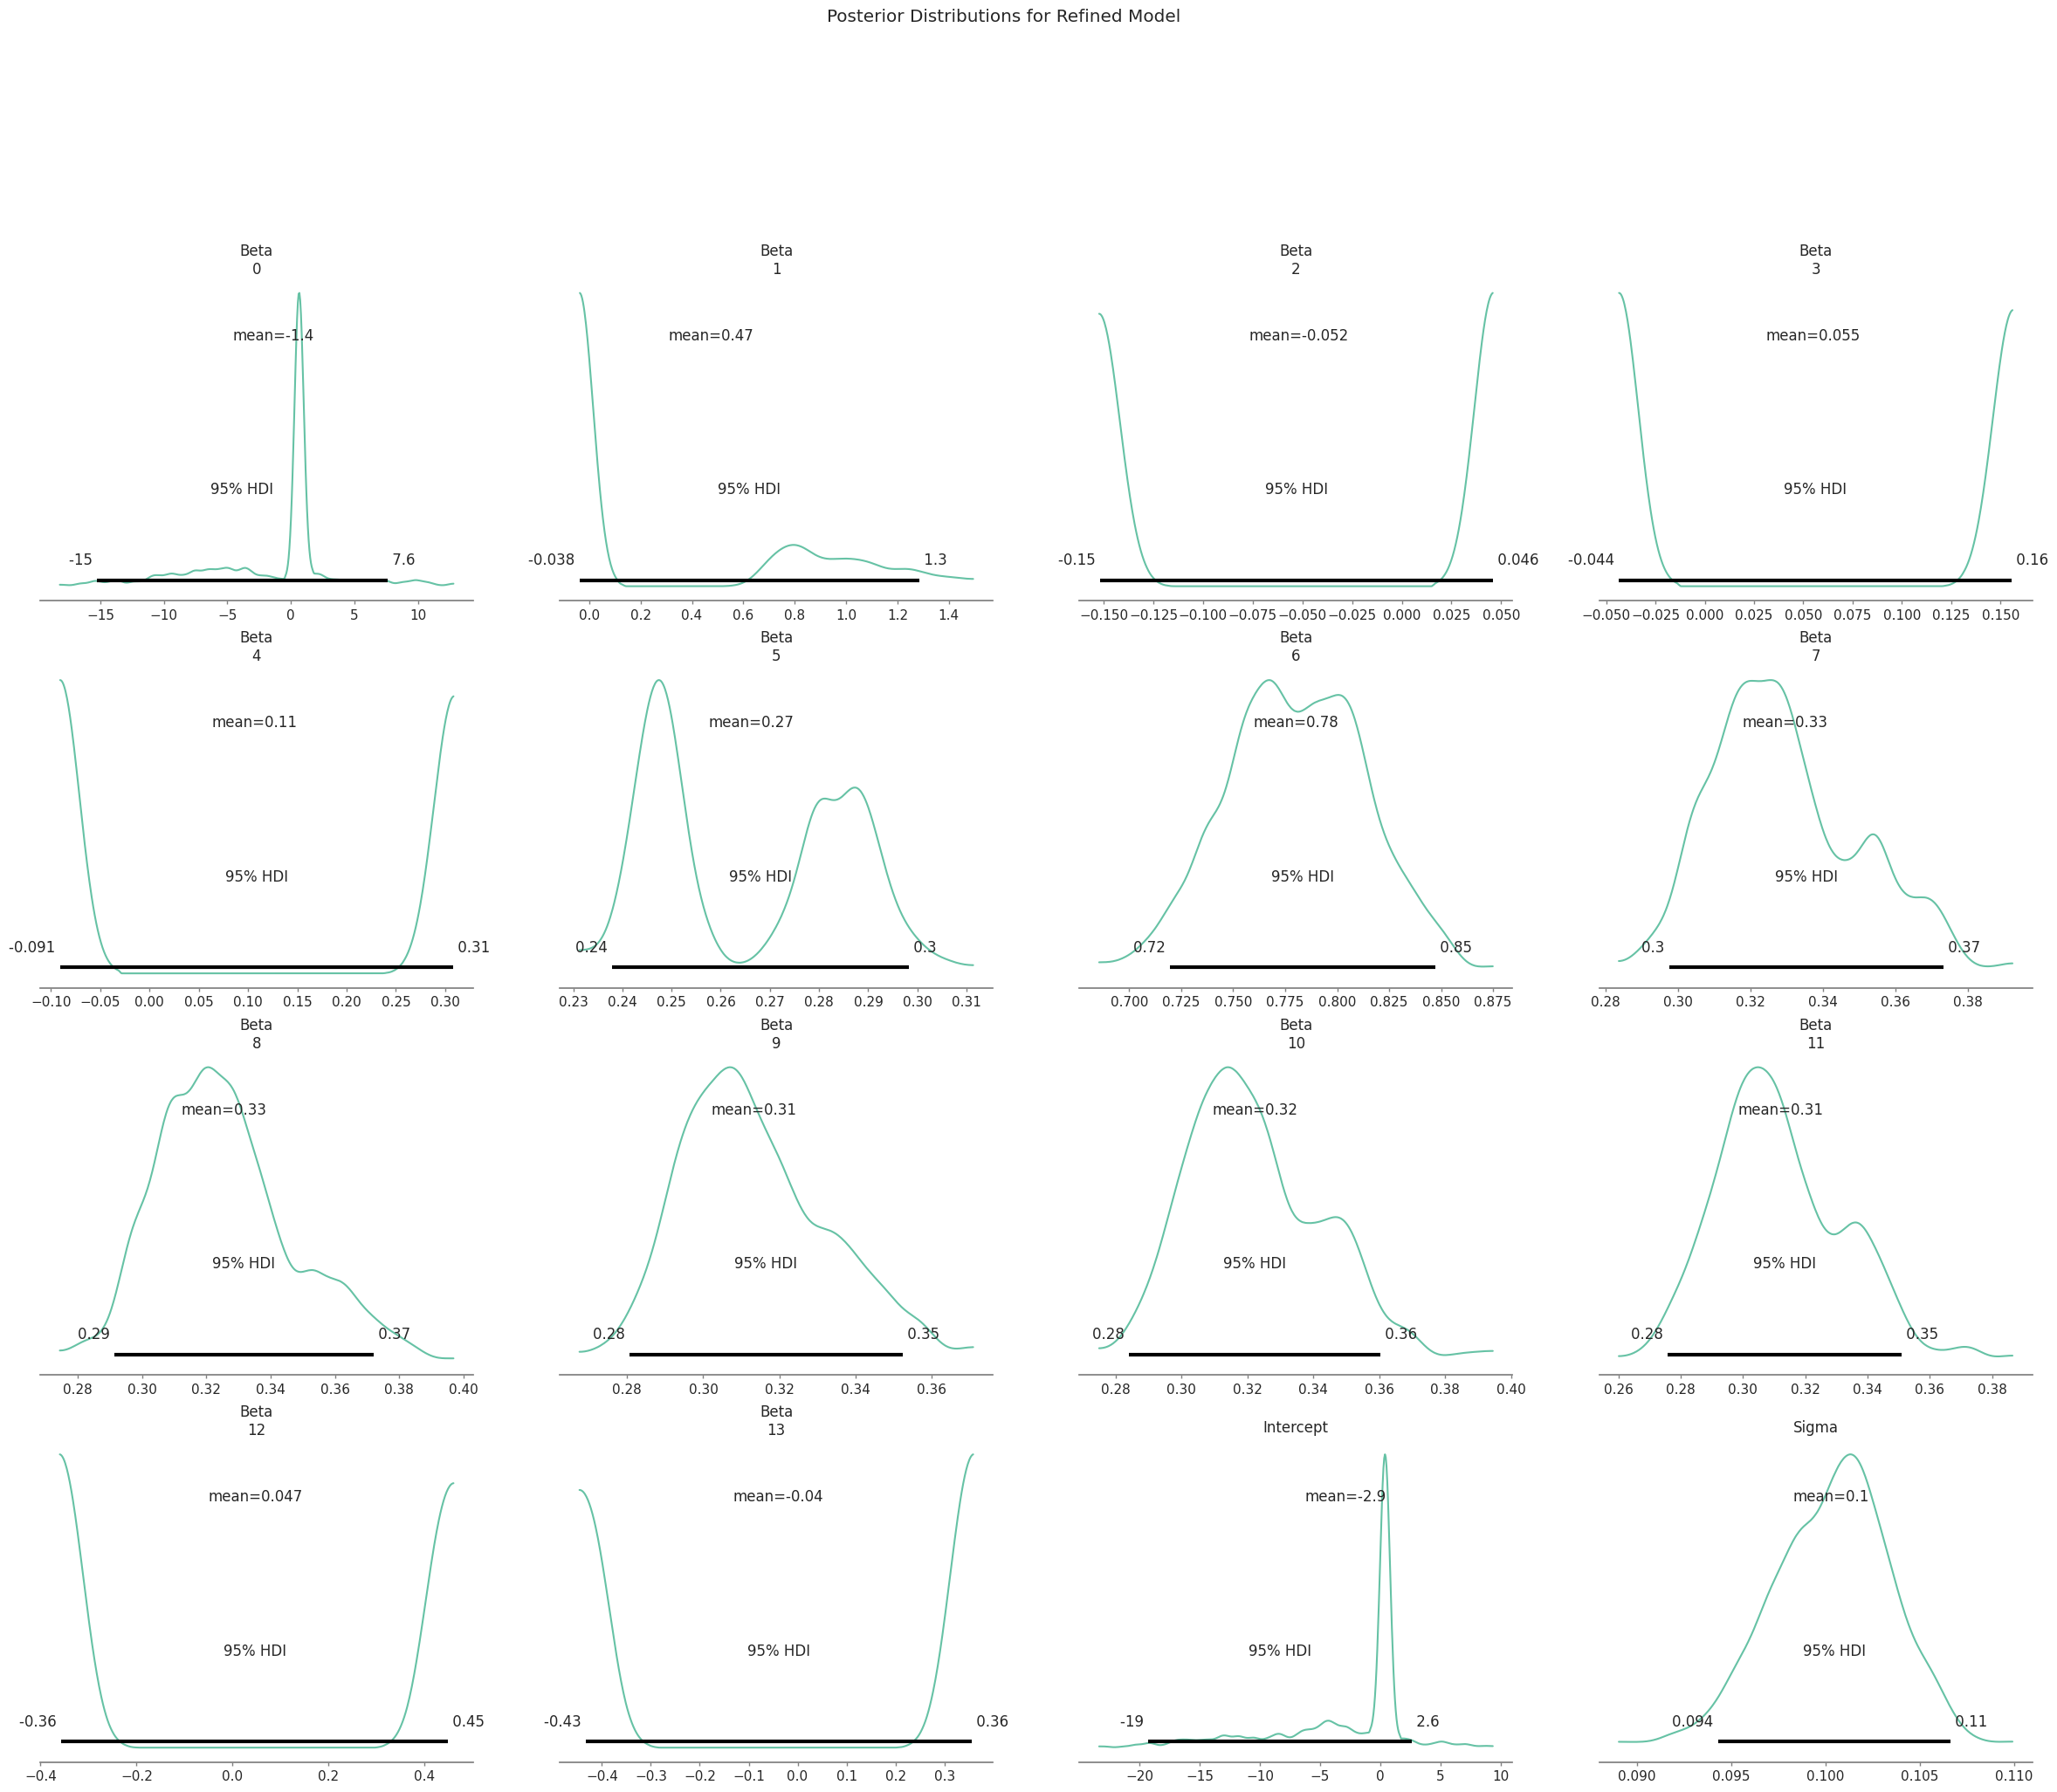

Output()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


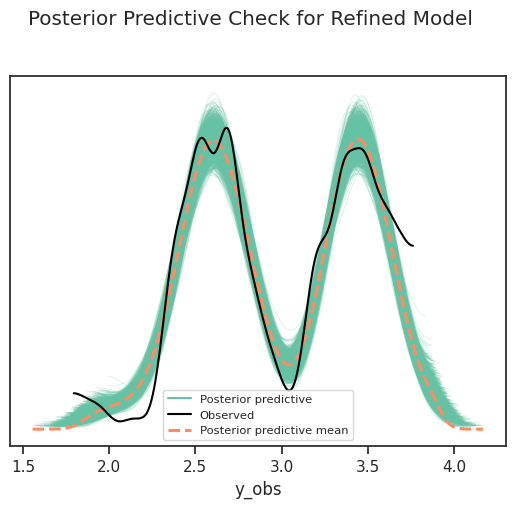

In [ ]:
# Rerun the Bayesian model with reduced predictors
with pm.Model() as refined_bayesian_model:
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    beta = pm.Normal("Beta", mu=0, sigma=10, shape=X_heating_significant_const.shape[1] - 1)
    sigma = pm.HalfNormal("Sigma", sigma=1)

    # Linear predictor
    mu = intercept + pm.math.dot(X_heating_significant_const.iloc[:, 1:], beta)

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=np.log(y_heating))

    # Sample from the posterior
    refined_trace = pm.sample(1000, target_accept=0.95, return_inferencedata=True)

# Summarize and plot posterior distributions
az.plot_posterior(refined_trace, hdi_prob=0.95)
plt.suptitle("Posterior Distributions for Refined Model", y=1.02)
plt.show()

with refined_bayesian_model:
    ppc_refined = pm.sample_posterior_predictive(refined_trace)
az.plot_ppc(ppc_refined)
plt.suptitle("Posterior Predictive Check for Refined Model", y=1.02)
plt.show()


* The refined model shows improved clarity in posterior distributions, with significant predictors having narrower credible intervals and clearer effects. The posterior predictive check indicates that the model captures the observed trend well, with predicted distributions aligning closely with observed data.

Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


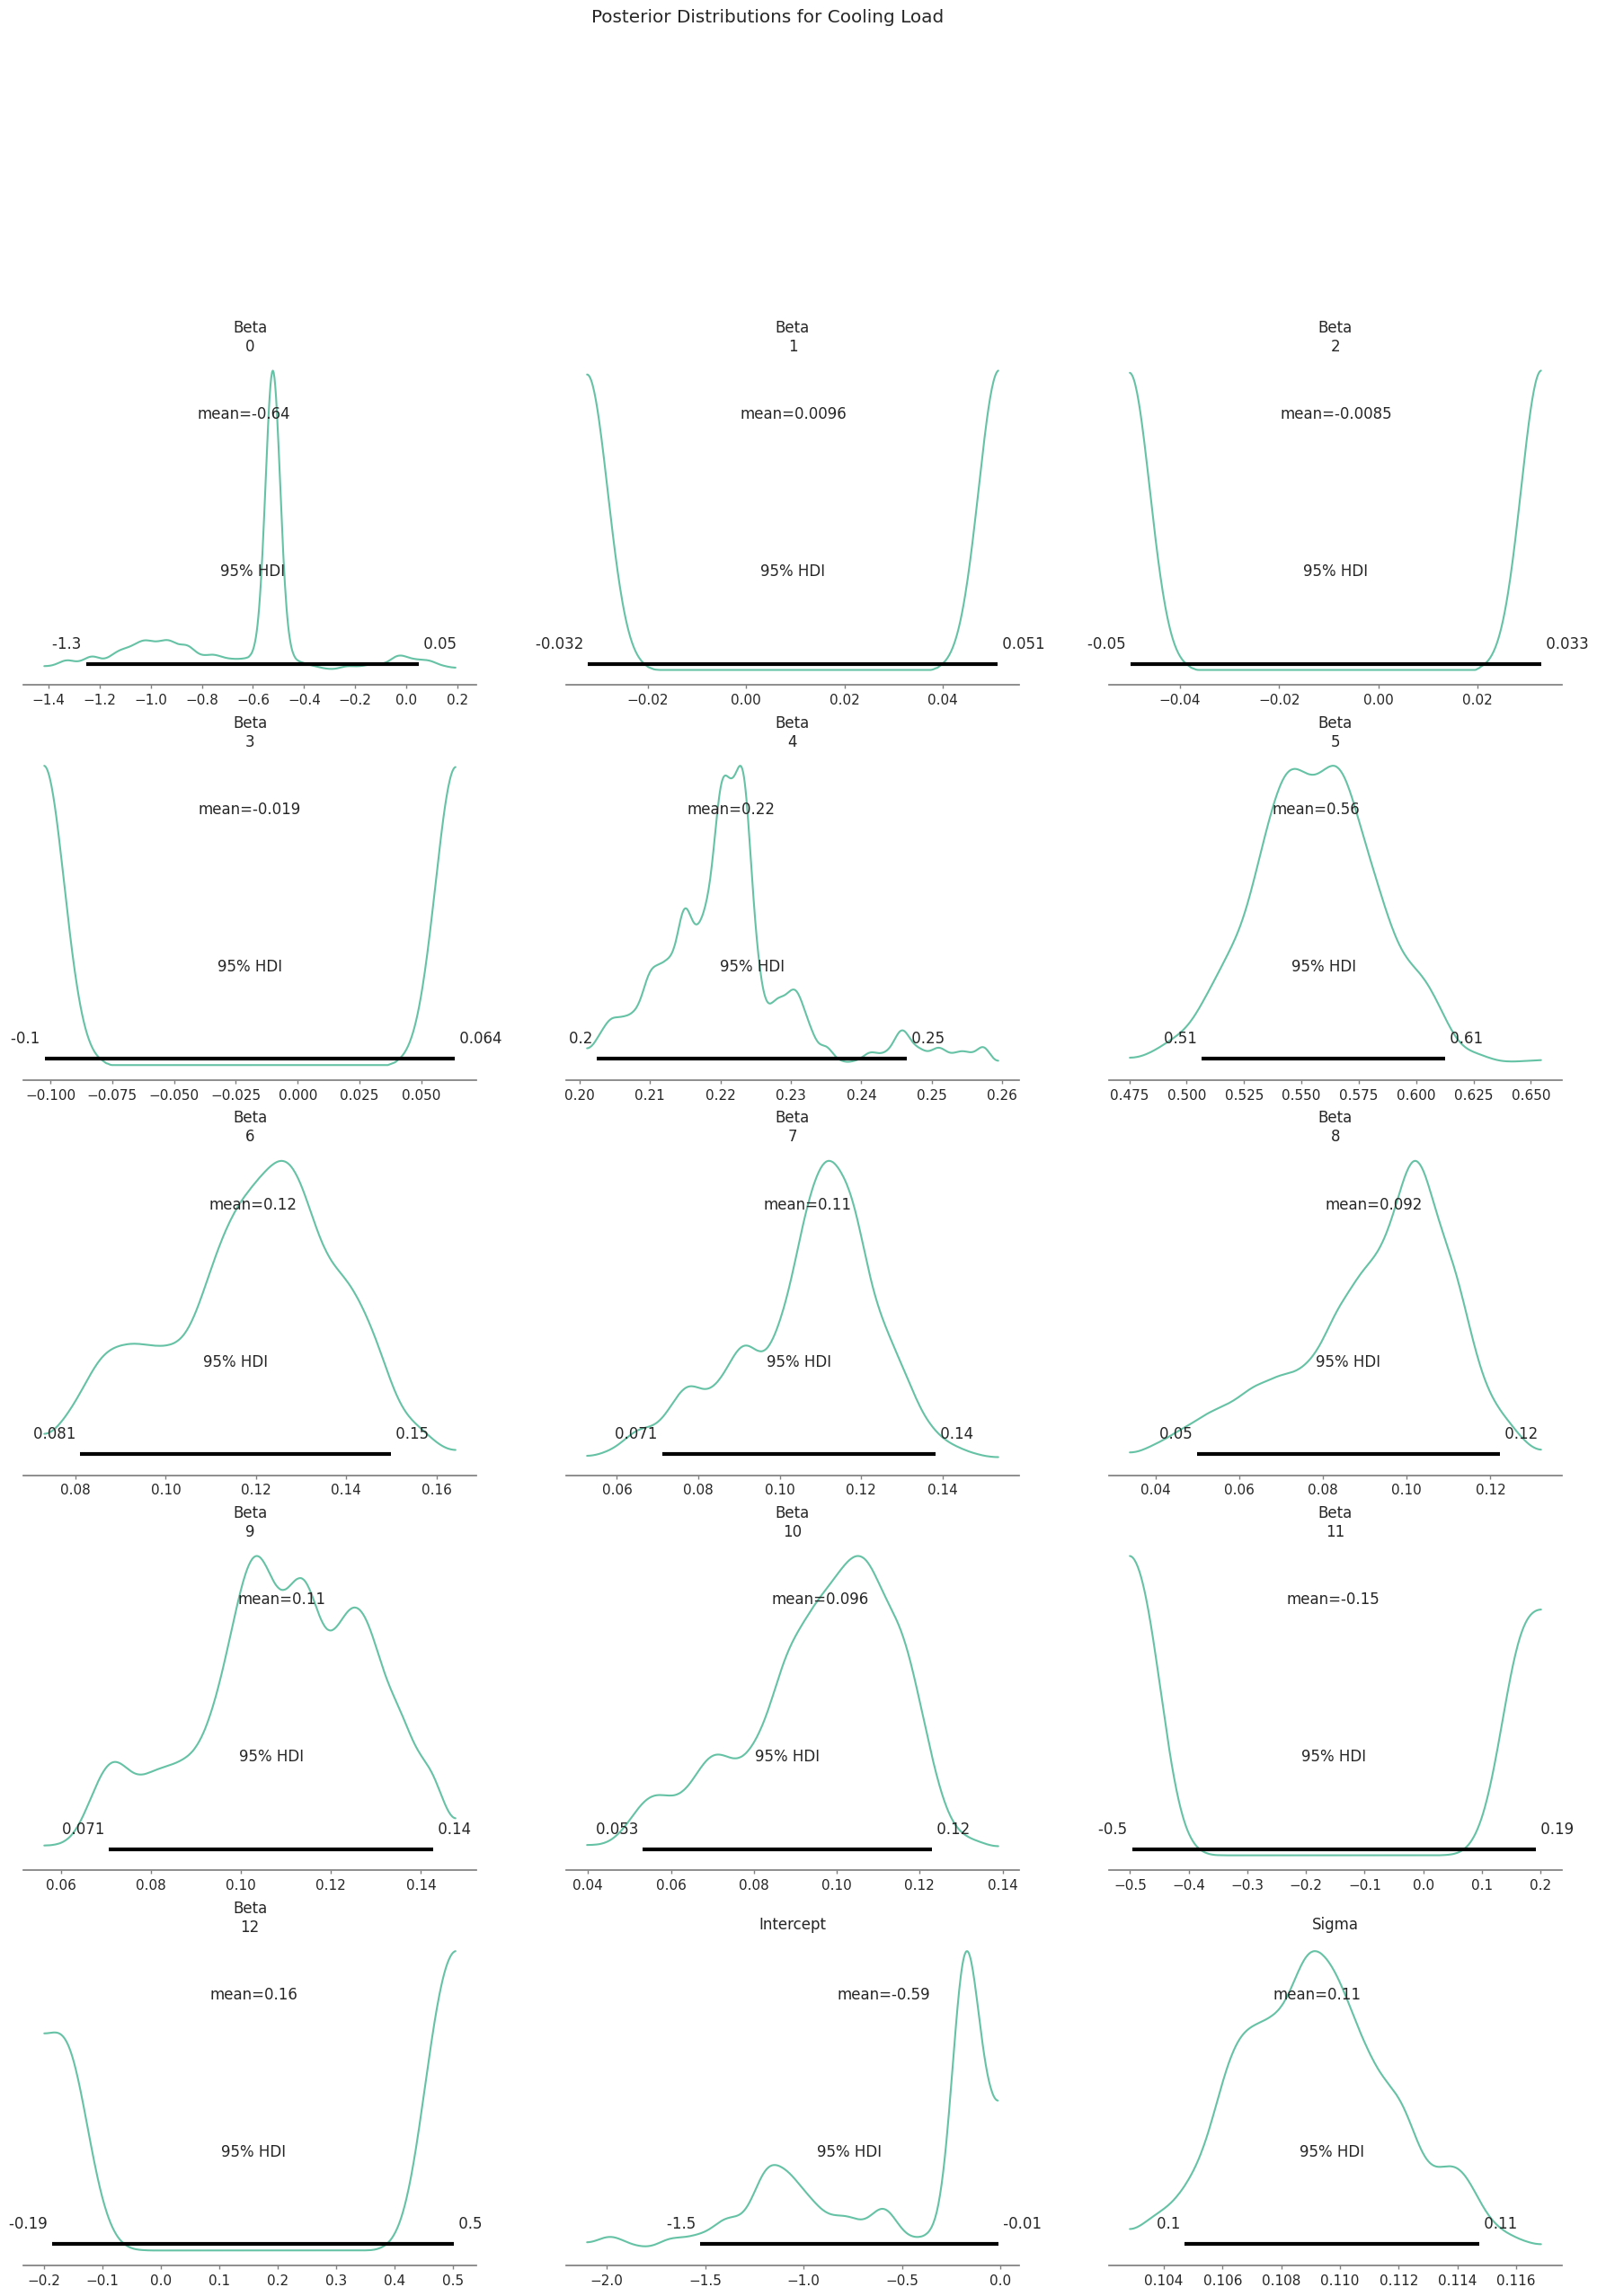

Output()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


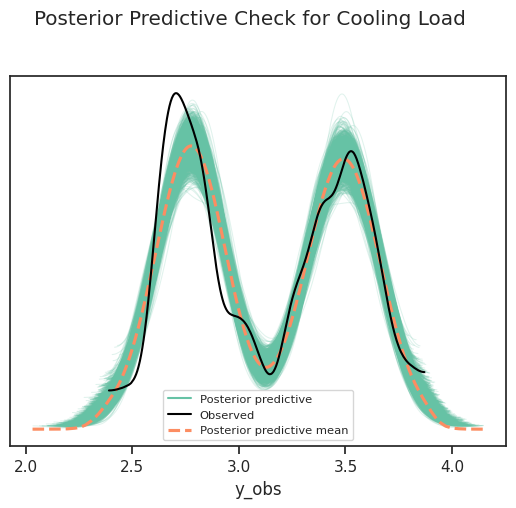

In [ ]:
X_cooling_significant_const = X_heating_reduced_const.copy()

with pm.Model() as bayesian_model_cooling:
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    beta = pm.Normal("Beta", mu=0, sigma=10, shape=X_cooling_significant_const.shape[1] - 1)
    sigma = pm.HalfNormal("Sigma", sigma=1)

    # Linear predictor
    mu = intercept + pm.math.dot(X_cooling_significant_const.iloc[:, 1:], beta)

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=np.log(y_cooling))

    # Sample from posterior
    trace_cooling = pm.sample(1000, target_accept=0.95, return_inferencedata=True)

# Summarize and plot posterior distributions
az.plot_posterior(trace_cooling, hdi_prob=0.95)
plt.suptitle("Posterior Distributions for Cooling Load", y=1.02)
plt.show()

# Posterior Predictive Check
with bayesian_model_cooling:
    ppc_cooling = pm.sample_posterior_predictive(trace_cooling)
az.plot_ppc(ppc_cooling)
plt.suptitle("Posterior Predictive Check for Cooling Load", y=1.02)
plt.show()

## **Analysis of Cooling Load Bayesian Model**

- Posterior Distributions:

Several predictors have narrow distributions with credible intervals (95% HDI) that do not include zero, indicating strong effects (e.g., Beta[4], Beta[5]).
Some predictors (Beta[1], Beta[2]) have mean values near zero and wide intervals, suggesting weak or insignificant effects.

- Posterior Predictive Check:

The predicted values align well with the observed data, as seen in the PPC plot.
The model captures the overall trend effectively, though slight deviations remain at the peaks.

- Performance:

The model performs well, with good posterior convergence and a reliable fit to the observed data.

# **Conclusion: Final Results and Comparison of Bayesian and Linear Regression Models**

## 1. Heating Load
### Linear Regression Results
- The model performed well with an **R² of 0.947**, explaining 94.7% of the variance in Heating Load.
- Significant predictors included `Relative Compactness`, interaction terms (`Compactness_Surface_Interaction`), and `Glazing Area Distribution`.
- Insignificant predictors (e.g., `Orientation`) were excluded to refine the model.

### Bayesian Model Results
- The Bayesian model confirmed similar significant predictors with narrow posterior distributions (e.g., `Relative Compactness`, `Glazing Area Distribution`).
- The **posterior predictive check (PPC)** showed strong alignment between predicted and observed values, indicating good model fit.
- Some predictors had high uncertainty (wide HDI), leading to further refinement.

---

## 2. Cooling Load
### Linear Regression Results
- The model achieved an **R² of 0.915**, explaining 91.5% of the variance in Cooling Load.
- Significant predictors included interaction terms (`Compactness_Surface_Interaction`) and categorical variables (`Glazing Area Distribution`).
- Insignificant predictors like `Orientation` were excluded during refinement.

### Bayesian Model Results
- The Bayesian model aligned closely with the linear regression in identifying significant predictors, such as `Compactness_Surface_Interaction` and `Glazing Area Distribution`.
- The **PPC plot** demonstrated good predictive performance, capturing the overall data trend effectively.

---

## 3. Comparison of Methods
- Both Bayesian and linear regression models identified consistent significant predictors for Heating and Cooling Loads.
- **Bayesian Inference** provided additional insights:
  - Quantified uncertainties with posterior distributions.
  - Offered credible intervals for each predictor, adding robustness to the conclusions.
- **Linear Regression** models were faster to implement and interpret, making them effective for initial analysis, while Bayesian models added depth by accounting for uncertainty.

---

## **In Summary**
This project successfully identified key predictors influencing Heating and Cooling Loads. The combination of Bayesian and linear regression models provided robust and actionable insights for optimizing building energy efficiency. Future work could explore more complex models or incorporate additional features (e.g., temporal or environmental factors) for further refinement.
